# Анализ лояльности пользователей Яндекс Афиши

# Исследовательский анализ заведений общественного питания г. Москвы

- Автор: Климанова Ирина
- Дата:26.12.2025


### Цели и задачи проекта
<font color='#snow4'>

    
**Цель проекта** 

Провести сследовательский анализ данных сервиса Яндекс.Афиша, чтобы выявить факторы, влияющие на лояльность пользователей, и определить, какие пользователи с наибольшей вероятностью возвращаются на платформу и совершают повторные покупки. Результаты анализы должны помочь маркетинговой комаде повысить удержание клиентов и эффективноть маркетинговых активностей.

**Задачи проекта**
1. Изучить данные сервиса:
    * проанализировать структуру и содержание доступного датасета;
    * проверить данные на полноту, корректность и налиие пропусков
2. Проанилизировать поведение пользователей:
    * исследовать частоту покупок, интервалы между заказами и повторные визиты;
    * выделить пользователей, совершающих повторные покупки
3. Выявить признаки лояльности:
    * определить характеристики пользователей, склонных к возврату;
    * найти закономерности, отличающие лояльных клиентов от разовых
4. Сегментировать пользователей:
    * разделить аудиторию на группы по уровню активности и вероятности возврата;
    * оценить вклад каждого сегмента в выручку и удержание
5. Сформулировать аналитические выводы и рекомендации:
    * подготовить выводы для маркетинговой команды;
    * предложить направления для персонализации предлжоений, таргетинга рекламы.</font>

<font color='#snow4'>
    
**Описание датасета:**
    
* `user_id` - уникальный идентификатор пользователя, совершившего заказ;
* `device_type_canonical` - тип устройства, с которого был оформлен заказ ( например, `mobile` - мобильные устройства, `desktop` - стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие</font>

### Содержимое проекта

* [1.Загрузка данных и их предобработка](#link01)
    * [Задача 1.1](#link02)
    * [Задача 1.2](#link03)
    * [1.3. Промежуточный вывод](#link04)
* [2.Предобработка данных](#link05)
    * [Задача 2.1](#link06)
    * [Задача 2.2](#link07)
    * [1.5. Общие выводы после обработки данных](#link08)
* [3. Создание профиля пользователя](#link09)
    * [Задача 3.1](#link10)
    * [Задача 3.2](#link011)
* [4. Исследовательский анализ данных](#link12)
* [4.1. Исследование признаков первого заказа и их связи с возвращением на платформу](#link13)
    * [Задача 4.1.1](#link14)
    * [Задача 4.1.2](#link15)
    * [Задача 4.1.3](#link16)
* [4.2. Исследование поведения пользователей через показатели выручки и состава заказа](#link17)
    * [Задача 4.2.1](#link18)
    * [Задача 4.2.2](#link19)
    * [Задача 4.2.3](#link20)
* [4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки](#link21) 
    * [Задача 4.3.1](#link22)
    * [Задача 4.3.2](#link23)
* [4.4. Корреляционный анализ количества покупок и признаков пользователя](#link24)    
    * [Задача 4.4.1](#link25)
* [5. Общий вывод и рекомендации](#link26)

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---
<a class='anchor' id="link02"></a>

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`(защищённые):

- **Хост** — `DB_HOST`
- **База данных** — `DB_NAME`
- **Порт** — `DB_PORT`
- **Пользователь** — `DB_USER`
- **Пароль** — `DB_PASSWORD`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---

In [1]:
!pip install sqlalchemy
!pip install psycopg2-binary
!pip install dotenv
!pip install phik

In [2]:
# импортируем библиотеки для работы
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import dotenv
from phik import phik_matrix
import seaborn as sns


In [3]:
#создаем подключение к базе данных
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-afisha' # название
             }
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)
engine = create_engine(connection_string) 

In [4]:
#создаем запрос и считываем данные
query ="""
SELECT 
    p.user_id,
    p.device_type_canonical,
    p.order_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,
    p.tickets_count,
    p.created_dt_msk::DATE - LAG(p.created_dt_msk::DATE) OVER (
        PARTITION BY p.user_id 
        ORDER BY p.created_dt_msk
    ) AS days_since_prev,
    p.event_id,
    e.event_name_code AS event_name,
    e.event_type_main,
    p.service_name,  -- берём из purchases, как указано в схеме
    c.city_name,
    r.region_name
FROM afisha.purchases AS p
JOIN afisha.events AS e
    ON p.event_id = e.event_id
JOIN afisha.city AS c
    ON e.city_id = c.city_id
JOIN afisha.regions AS r
    ON c.region_id = r.region_id
WHERE 
    p.device_type_canonical IN ('mobile', 'desktop')
    AND e.event_type_main != 'фильм'
ORDER BY p.user_id
"""

df = pd.read_sql_query(query, con=engine) 

---
<a class='anchor' id="link03"></a>

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [6]:
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Глиногорск,Каменевский регион
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Глиногорск,Каменевский регион
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Озёрск,Североярская область
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Родниковецк,Озернинский край


<a class='anchor' id="link04"></a>
### Промежуточный вывод

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

<font color='#snow4'>**Общая информация о данных**
   
* Данные содержат **290611** заказов и **15** столбцов. 
* Пропуски = **21933** присутствуют только в столбце `days_since_prev`, что может объясняться тем, что для некоторых пользователей - это их первый заказ и значения предыдущей даты для расчета отсутвуют. Данные пропуски являются логичеаски обоснованными, удаление таких строк нецелесообразно, т.к. приведет к потери ифнормации о первых заказах пользователей. В рамках предобработки данные пропуски можно сохранить, но добавить дополрнительную колонку, которая отражала бы первый заказ пользователя или повторный, которая может понадобиться для дальнейшего анализа.
* Количество строк одинаково по всем ключевым полям `order_id`, `user_id`, `event_id`, отсутствуют NULL. Все заказы подержат валюту, количество билетов, а также выручку. Т.е. выгрузка выполнена корректно и данные пригодны к аналитике.

**Корректность типов данных и оптимизация памяти:**
 - Столбцы, типа *object* `device_type_canonical`, `currency_code`, `event_type_main`,`service_name`,`city_name`,`region_name`,`event_name`можно привести к типу `category`,  чтобы уменьшить потребление памяти и ускорить группировки и агрегации;
 -   Столбец `tickets_count` можно привести к  int16;
 - Столбцы `event_id`, `order_id` - не числовые величины, а идентификаторы, поэтому можно привести к типу int16;
 - Столбец `revenue` можно привести к float 32, n.к. двойная точность может быть избыточна.
 
Данные готовы к дальнейшему исследовательскому анализу после минимальной предобработки.</font></div>


---
<a class='anchor' id="link05"></a>
###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---
<a class='anchor' id="link06"></a>
**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [7]:
# проводим унификации валюты 
kurs = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv',
                  parse_dates = ['data'])
df['order_dt'] = df['order_ts'].dt.normalize()
df = df.merge(kurs[['data','curs']], left_on='order_dt', right_on='data',how='left').drop(columns='data')
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)

In [8]:
# выведем строки, где валюта оплаты в столбце `currency_code` в тенге и посмотрим новый столбец `revenue_rub` - в рублях ли
df.loc[df['currency_code'] == 'kzt'].head(5)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,curs,revenue_rub
70,0033403583a55ed,mobile,7850214,2024-09-17,2024-09-17 16:52:06,kzt,518.10,4,20.0,559919,f5ec2467-ee48-42f3-89a0-a2d90d1d6fce,другое,Билеты без проблем,Серебрянка,Верхоречная область,19.0125,98.503762
89,0040e12d70fae81,desktop,8634925,2024-09-02,2024-09-02 19:49:14,kzt,347.18,3,39.0,559476,61ec7c0e-ea0c-4a3e-a63a-09cbe1bc6177,другое,Билеты без проблем,Серебрянка,Верхоречная область,18.9330,65.731589
96,0054b38b2653e6e,mobile,7625522,2024-09-09,2024-09-09 18:06:04,kzt,328.77,4,NaN,559582,524f434e-0381-4f47-9688-7c4e41961b65,другое,Билеты без проблем,Серебрянка,Верхоречная область,18.5991,61.148261
277,00f4f5244501ce6,mobile,720419,2024-06-11,2024-06-11 20:15:57,kzt,22021.55,5,NaN,536826,76af4f88-c554-4e9e-9df4-1cc8aeec8959,концерты,Мой билет,Серебрянка,Верхоречная область,19.8928,4380.702898
460,01370a0e9c1a7d5,mobile,2229811,2024-06-04,2024-06-04 13:19:47,kzt,7397.66,4,1.0,533803,0686ac7b-6f3e-4177-bb73-16b54acd1223,концерты,Мой билет,Широковка,Шанырский регион,19.9833,1478.296591


In [9]:
# Проверим нет ли пропусков после объединения курсов
df['curs'].isna().mean()

0.0

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">
    
**Комментарий**: результат -  0.0, значит курс найден для всех заказов, значит данные в  `revenue_rub` корректны</font></div>

---
<a class='anchor' id="link07"></a>
**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [10]:
# проверяем пропуски в соответствие с заданием
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [11]:
# Добавляем новый столбец, который будет отражать первый заказ пользователя (1) или повторный (0), проверим сразу выгрузку
df['is_first_order'] = df['days_since_prev'].isna().astype(int)
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,curs,revenue_rub,is_first_order
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион,18.6972,1521.94,1
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Глиногорск,Каменевский регион,18.3419,289.45,1
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Глиногорск,Каменевский регион,19.6475,1258.57,0
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Озёрск,Североярская область,18.5010,8.49,1
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Родниковецк,Озернинский край,19.6648,1390.41,0


In [12]:
# проверяем добавился ли новый столбец
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,curs,revenue_rub,is_first_order
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион,18.6972,1521.94,1
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Глиногорск,Каменевский регион,18.3419,289.45,1
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Глиногорск,Каменевский регион,19.6475,1258.57,0
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Озёрск,Североярская область,18.5010,8.49,1
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Родниковецк,Озернинский край,19.6648,1390.41,0


In [13]:
# проверяем итоговый датафрейм, а также его "вес"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [14]:
# оптимизируем числовые данные
df = df.astype({
    'tickets_count':'int16',
    'event_id':'int32',
    'order_id':'int32',
    'is_first_order':'int16',
    'revenue':'float32',
    'days_since_prev': 'float32',
    'curs':'float32',
    'revenue_rub':'float32'
})

# приводим категориальгные признаки к типу `category`
cat_cols = [
    'device_type_canonical',
    'currency_code',
    'event_type_main',
    'service_name',
    'city_name',
    'region_name'
]

df[cat_cols] = df[cat_cols].astype('category')

In [15]:
# проверяем внесенные изменения
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  category      
 2   order_id               290611 non-null  int32         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  category      
 6   revenue                290611 non-null  float32       
 7   tickets_count          290611 non-null  int16         
 8   days_since_prev        268678 non-null  float32       
 9   event_id               290611 non-null  int32         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  category      
 12  service_name           290611 non-null  cate

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

<font color='#snow4'>**Комментарий:**
После оптимизации типа числовых данных и приведения категориальных признаков к типу `category` снизился объем используемой памяти  в 1.5 раза: с 42.1 MB до 20.8 MB без потери информации</font></div>

In [16]:
# Проверим полные дубликаты
dupl = df.duplicated().sum()
print('\nКоличество явных дубликатов:')
print(dupl)


Количество явных дубликатов:
0


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

<font color='#snow4'>**Комментарий:** в датафрейме отсутствуют полные дубликаты.</font></div>

In [17]:
# Проверяем неявные дубликаты по `order_id`,`user_id`,'event_id`,`order_ts`'
subset_cols = [
    'order_id',
    'user_id',
    'event_id',
    'order_ts'
]
dupl = df.duplicated(subset=subset_cols).sum()
print('\nНеявные дубликаты:')
print(dupl)


Неявные дубликаты:
0


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

<font color='#snow4'>**Комментарий:** тут тоже все прекрасно - неявные дубликаты отсутствуют.</font>

In [18]:
# Проверяем неявные дубликаты в других столбцах
dupl = ['device_type_canonical', 'order_dt','order_ts','currency_code','revenue','tickets_count','event_type_main']
dupl_cnt = df.duplicated(subset=dupl).sum()
dupl_share = dupl_cnt/len(df)*100

print(f"Количество неявных дубликатов {dupl_cnt}")
print(f"Доля неявных дубликатов {dupl_share:.2f}%")

Количество неявных дубликатов 351
Доля неявных дубликатов 0.12%


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">
    
<font color='#snow4'>**Комментарий:**
Доля выявленных неявных дубликатов составляет менее 1%, что не оказывет существенного влияния на качество данных</font></div>

In [19]:
# Приводим к одному регистру `service_name`,`city_name`,`region_name` для нормализации
df['service_name'] = df['service_name'].str.lower().str.strip()
df['city_name'] = df['city_name'].str.lower().str.strip()
df['region_name'] = df['region_name'].str.lower().str.strip()

In [20]:
# проверяем изменения после нормализации
df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,curs,revenue_rub,is_first_order
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.939941,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,глиногорск,каменевский регион,18.697201,1521.939941,1
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.450012,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,мой билет,глиногорск,каменевский регион,18.341900,289.450012,1
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.569946,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,за билетом!,глиногорск,каменевский регион,19.647499,1258.569946,0
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.490000,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,лови билет!,озёрск,североярская область,18.500999,8.490000,1
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.410034,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,билеты без проблем,родниковецк,озернинский край,19.664801,1390.410034,0


In [21]:
for col in cat_cols:
    print(f'\n===== {col} =====')
    print('Количество уникальных значений:')
    print(df[col].nunique())
    
    print('\nПропуски:')
    print(df[col].isna().sum()) 
    
    print('\nРаспределение значений:')
    print(df[col].value_counts(dropna=False).head(10))


===== device_type_canonical =====
Количество уникальных значений:
2

Пропуски:
0

Распределение значений:
mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64

===== currency_code =====
Количество уникальных значений:
2

Пропуски:
0

Распределение значений:
rub    285542
kzt      5069
Name: currency_code, dtype: int64

===== event_type_main =====
Количество уникальных значений:
7

Пропуски:
0

Распределение значений:
концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
Name: event_type_main, dtype: int64

===== service_name =====
Количество уникальных значений:
36

Пропуски:
0

Распределение значений:
билеты без проблем    63519
лови билет!           41124
билеты в руки         40343
мой билет             34839
облачко               26642
лучшие билеты         17774
весь в билетах        16849
прачечная             10273
край билетов           6207
тебе билет!            5228
Name:

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">
    
**Комментарий по анализу категориальных признаков:**
* `device_type_canonical`:
    * категории ожидаемые, явный перекос в сторону мобильных телефонов, что ожидаемо и отражает реальное поведение пользователей в целом в текущих реалиях.
    * можно использовать без дополнительной обработки
* `currency_code`:
    * 2 типа валюты, при этом тенге составляет меньшую долю, но т.к. мы привели выручку к рублям отдельным столбцом в целом можно его не исопльзовать для дальнейшего анализа
* `event_type_main`:
    * все категории логичны, ёлки и выставки - редкие категории, но сезонные, что тоже является нормой. Имеется категория `другое`, не совсем понятно, что вполне может быть допустимо (например: зоопарк, цирк и др.);
    * явных аномалий нет, редкие категории чисто гипотетически можно объединить в одну группу по необходимости для дальнейшего анализа.
*`service_name`:
    * высокая кардинальность, в связи с этим можно для упрощения агрегировать редкие сервисы по необходимости.
*`city_name`:
    * выявлена высокая кардинальность, т.к. в столбце слишком много уникальных категорий (в нашем случае - 352), что может говорить о том, что многие города имеют мало наблюдений, почти не влияют на целевую метрику и могут дулировать эффект региона.
    * для моделирования целесобразнее использовать агрегированный уровень по региону, либо объединять редкие города в категорию `other`, выделив топ-10/20. В соответствие с дальнейшим заданием будет принято решение о применямом подходе.
*`region_name`:
    * уникальных значений = 81, что говорит об умеренной кардинальности, при этом имеются выраженные лидеры;
    * признак выглядит более устойчивым, чем города.
    
**Общий вывод**:
* В результате анализа категориальных признаков аномалий и некорректных значений нне выявлено.
* Все признаки содержат ожидаемые категории без пропусков.
* В ряде столбцов, типа `currency_code`, `event_type_main`,`service_name` присутствуют редкие категории, что является отражением реальной картины, а не ошибкой. 
* Признаки с высокой кардинальностью `city_name`, `service_name` могут потребовать дополнительной агрегации при дальнейшем моделировании, однаком для аналитических задач в целом они корректны и информативны.</div>

In [22]:
# проверим распределение данных в ключевом столбце `revenue`

print('Показатели поля revenue')
print(df['revenue'].describe())
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = df[(df['revenue'] < low)| (df['revenue'] > high)]

print(f"99 процентиль = {df['revenue'].quantile(0.99):.2f}")
print(f'IQR=[{Q1:.0f}; {Q3:.0f}] -> границы выбросов: < {low:.0f} или > {high:.0f}')
print(f'Выбросов найдено: {outliers.shape[0]} ({outliers.shape[0]/df.shape[0]:.2%})')


Показатели поля revenue
count    290611.000000
mean        625.584412
std        1227.693115
min         -90.760002
25%         116.849998
50%         356.010010
75%         810.130005
max       81174.539062
Name: revenue, dtype: float64
99 процентиль = 4003.13
IQR=[117; 810] -> границы выбросов: < -923 или > 1850
Выбросов найдено: 12454 (4.29%)


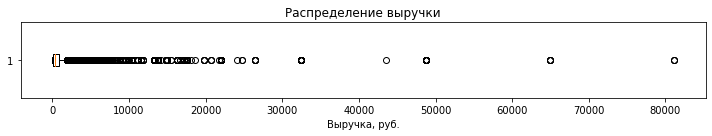

In [23]:
# строим boxplot, чтобы визуально было понятно распределение выбросов

plt.figure(figsize=(10,2))
plt.boxplot(df['revenue'], vert = False)
plt.xlabel('Выручка, руб.')
plt.title('Распределение выручки')

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Распределение выручки имеет выраженную правостороннюю асимметрию с длинным звостом редких крупных заказов (что видно на boxplot). 
* Основная масса заказов сосредоточена в диапазоне до 1000 рублей, а медиана составляет 356 рублей.
* Значения выше 99 процентиля ( > 4000 руб ) являются редкими и существенно искажают распределение, поэтому для дальнейшего анализа лучше отфильтровать выбросы по 99 перцентилю.
* Также выявлены аномальные отрицательные значения выручки, что может гооврить о возвратах (почти всегда), отменах или корректировках заказов. Я планирую исключить отрицательные значения.</div>

In [24]:
# Убираем 1% экстремальных значений и отрицательные значения, что сделаем распределение более инетрпретируемым. Проверяем

df = df.drop(df[(df['revenue'] <=0) | (df['revenue'] > 4003.13)].index)
print('Показатели поля revenue')
print(df['revenue'].describe())


Показатели поля revenue
count    281797.000000
mean        549.362000
std         564.617432
min           0.020000
25%         125.589996
50%         362.190002
75%         805.080017
max        4000.189941
Name: revenue, dtype: float64


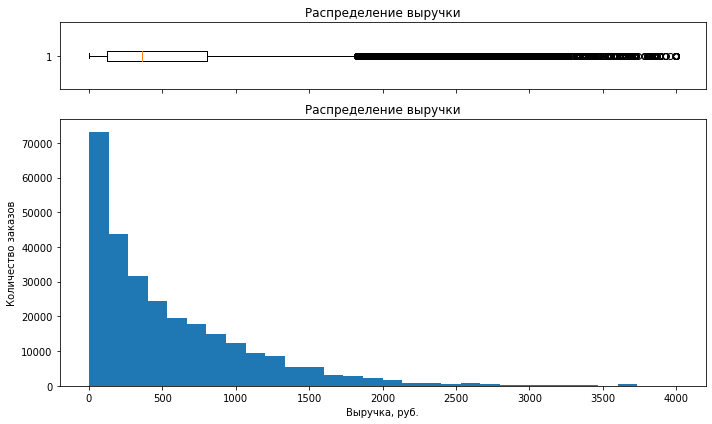

In [25]:
# Строим графики для наглядности 

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,6),
    gridspec_kw={'height_ratios':[1,4]},
    sharex=True)

# boxplot
axes[0].boxplot(df['revenue'],vert=False)
axes[0].set_title('Распределение выручки')

# histogram
axes[1].hist(df['revenue'],bins=30)
axes[1].set_xlabel('Выручка, руб.')
axes[1].set_ylabel('Количество заказов')
axes[1].set_title('Распределение выручки')

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий**:

После обработки данных:
* Распределение выручки сильно скошено вправо
* Медиана **362 руб** значительно меньше среднего **549 руб**, что говорит о влиянии крупных заказов
* 99% заказов - менее 4000 руб.
* Экстремальные покупки до 80 тыс руб редкие, но влиятельные</div>

In [26]:
# проверим распределение данных в ключевом столбце `tickets_count`

print('\n\nПоказатели поля tickets_count')
print(df['tickets_count'].describe())
Q1 = df['tickets_count'].quantile(0.25)
Q3 = df['tickets_count'].quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = df[(df['tickets_count'] < low)| (df['tickets_count'] > high)]

print(f"99 процентиль = {df['tickets_count'].quantile(0.99)}")
print(f'IQR=[{Q1:.0f}; {Q3:.0f}] -> границы выбросов: < {low:.0f} или > {high:.0f}')
print(f'Выбросов найдено: {outliers.shape[0]} ({outliers.shape[0]/df.shape[0]:.2%})')



Показатели поля tickets_count
count    281797.000000
mean          2.753464
std           1.165729
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          47.000000
Name: tickets_count, dtype: float64
99 процентиль = 6.0
IQR=[2; 4] -> границы выбросов: < -1 или > 7
Выбросов найдено: 119 (0.04%)


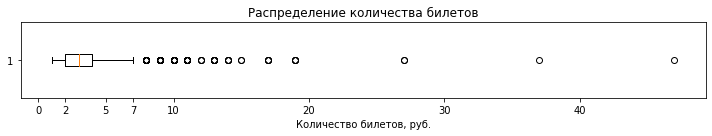

In [27]:
# Строим boxplot, чтобы визуально было понятно распределение выбросов

plt.figure(figsize=(10,2))
plt.boxplot(df['tickets_count'], vert = False)
plt.xticks([0,2,5,7,10,20,30,40])
plt.xlabel('Количество билетов, руб.')
plt.title('Распределение количества билетов')

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
    
**Общая картина распределения:**
* Выборка очень большая и составляет **281797** билетов, значит можно смело анализировать данные
* Медиана - **3** билета больше среднего значения - **2.75**, распределение правосторонне скошено
* Большинство покупают **2-4** билета, что подтверждается на boxplote

**Выбросы и аномалии**:
* Минимальное значение - **1** билет, что логично, максимум - **47** билетов, что выглядит нетипично.
* 99-й процентиль - **6** билетов, что тоже логично в рамках реальности. После **6** билетов начинается длинный хвост, где много одиночных выбросов, а также имеются экстремальные значения до **47** (что выше уже указала)
* Выбросы могут быть обусловлены корпоративными или групповыми закупками, возможна активность перекупщиков, автоматизированных заказов

</div>

In [28]:
# Убираем 1% экстремальных значений и отрицательные значения, что сделаем распределение более интерпретируемым. Проверяем

df = df.drop(df[(df['tickets_count'] > 6.0)].index)
print('Показатели поля tickets_count')
print(df['tickets_count'].describe())

Показатели поля tickets_count
count    281616.000000
mean          2.748942
std           1.146081
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: tickets_count, dtype: float64


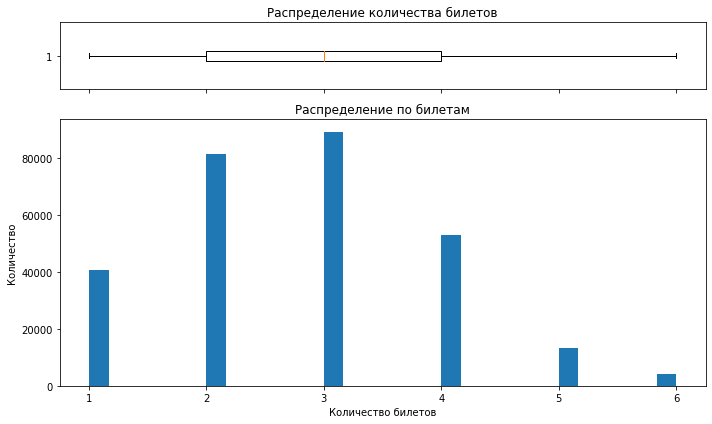

In [29]:
# Строим графики для наглядности после оптимизации 

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,6),
    gridspec_kw={'height_ratios':[1,4]},
    sharex=True)

# boxplot
axes[0].boxplot(df['tickets_count'],vert=False)
axes[0].set_title('Распределение количества билетов')

# histogram
axes[1].hist(df['tickets_count'],bins=30)
axes[1].set_xlabel('Количество билетов')
axes[1].set_ylabel('Количество')
axes[1].set_title('Распределение по билетам')

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
    
* Удалено **181** экстремальное значение, что составляет **0.06%** от общего числа.
* После удаления **1%** экстремальных значений распределения количества билетов стало компактным и интерпретируемым.
* Основная масса пользователь приобретает **2-4** билета, медианное значение - **3**, при этом среднее осталось почти таким же - **2.748** (было - **2.753**). т.е. удаление хвоста не исказило тенденецию, а значит выбросы были правда редкими и удалось сохранить основную структуру данных.

</div>

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281616 entries, 0 to 290610
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                281616 non-null  object        
 1   device_type_canonical  281616 non-null  category      
 2   order_id               281616 non-null  int32         
 3   order_dt               281616 non-null  datetime64[ns]
 4   order_ts               281616 non-null  datetime64[ns]
 5   currency_code          281616 non-null  category      
 6   revenue                281616 non-null  float32       
 7   tickets_count          281616 non-null  int16         
 8   days_since_prev        260450 non-null  float32       
 9   event_id               281616 non-null  int32         
 10  event_name             281616 non-null  object        
 11  event_type_main        281616 non-null  category      
 12  service_name           281616 non-null  obje

<a class='anchor' id="link08"></a>

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

### **ОБЩИЕ ВЫВОДЫ ПОСЛЕ ОБРАБОТКИ ДАННЫХ**:
* До обработки было **290611** строк, **15** столбцов и память занимала - **33.3 МВ**. После обработки - **281616** строк, **18** столбцов, память занимает - **25.5 МВ**
* Удалено около **3%** строк, в основном за счет экстремальных значений. Т.к. фильтрация затронула небольшую долю данных - структура и распределение ключевых признаков сохранены.
* Пропуски выявлены только в `days_since_prev`, что не является ошибкой, т.к. это они отражают первый заказ пользователя. Для дальнейшей работы был создан дополнительный столбец.
* Проведена нормализация категориальных признаков: привели к единому формату - в книжний регистр, а также удаление пробелом, что улучшает качество моделей
* Числовые данные нормализованы и оптимизированы по типам, что позволило снизить память с **33.3 МВ** до **25.5 МВ** (с учетом добавленных столбцов), что также влияет на повышение эффективности обработки данных. 
* Добавлены новые столбцы:
    * curs - курс валюты к рублю, используется для норматизации выручки;
    * revenue_rub - выручка, пересчитанныя в рубли
    * is_first_order - отражает первый или повторый заказ пользователя в соответствие с данным в столбце `days_since_prev`
    
    
 </div>   
    

---
<a class='anchor' id="link09"></a>
### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---
<a class='anchor' id="link10"></a>
**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [31]:
# Сортируем данные по времени заказа, чтобы первый заказ был первым

df = df.sort_values(['user_id','order_ts'])

# Создаем профиль пользователя
user_profile = (
    df.groupby('user_id').agg(
        first_order_dt=('order_dt', 'min'),  # дата первого заказа
        last_order_dt=('order_dt', 'max'),   # дата последнего заказа
        first_device=('device_type_canonical', 'first'),  # устройство первого заказа
        first_region=('region_name', 'first'),  # регион первого заказа
        first_service=('service_name', 'first'),  # билетный партнер первого заказа
        first_event_type=('event_type_main', 'first'),  # жанр первого мероприятия
        total_orders=('order_id', 'nunique'),  # общее количество заказов
        avg_revenue_rub=('revenue_rub', 'mean'),  # средняя выручка в рублях
        avg_tickets=('tickets_count', 'mean'),  # среднее количество билетов
        avg_days_between=('days_since_prev', 'mean')  # среднее время между заказами
).reset_index()
)
    
# Добавляем бирнарные признаки
user_profile['is_two'] = (user_profile['total_orders'] >=2).astype(int)
user_profile['is_five'] = (user_profile['total_orders'] >=5).astype(int)
    
# Проверяем результат
print(f"Всего пользователей: {len(user_profile)}")
user_profile.head()


Всего пользователей: 21601


,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets,avg_days_between,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,каменевский регион,край билетов,театр,1,1521.939941,4.000000,NaN,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,каменевский регион,мой билет,выставки,2,774.010010,3.000000,75.0,1,0
2,000898990054619,2024-07-13,2024-10-23,mobile,североярская область,лови билет!,другое,3,767.213318,2.666667,51.0,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,каменевский регион,край билетов,театр,1,917.830017,4.000000,NaN,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,поленовский край,лучшие билеты,театр,2,61.309998,1.500000,16.0,1,0


In [32]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21601 entries, 0 to 21600
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           21601 non-null  object        
 1   first_order_dt    21601 non-null  datetime64[ns]
 2   last_order_dt     21601 non-null  datetime64[ns]
 3   first_device      21601 non-null  object        
 4   first_region      21601 non-null  object        
 5   first_service     21601 non-null  object        
 6   first_event_type  21601 non-null  object        
 7   total_orders      21601 non-null  int64         
 8   avg_revenue_rub   21601 non-null  float32       
 9   avg_tickets       21601 non-null  float64       
 10  avg_days_between  13419 non-null  float32       
 11  is_two            21601 non-null  int64         
 12  is_five           21601 non-null  int64         
dtypes: datetime64[ns](2), float32(2), float64(1), int64(3), object(5)
memory usa

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий по пользовательскому датафрейму:**
* Некоторые данные можно оптимизировать, но т.к. `user profile` занимает неольшое место - 21.6 тыс. строк и 2МВ можно этого н делать.
*`avg_days_between` имеет незаполненные строки, и это ожидаемо, т.к. у тех, кто сделал 1 заказ - нет интервала между заказами (по аналогии, как было в начале). С этим мы ничего не делаем.</div> 

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Общий комментарий:**
* Построение профиля необходимо для перехода от уровня отдельных заказов к упровню пользователй, чтобы описать поведение каждого клиента агрегированными признаками. Такой профиль позволяет анализировать полный цикл активности у пользователя, в том числе астоту покупок, потраченные деньги и какие мероприятия предпочитает.
* Добавление бинарных признаков `is_two` и `is_five` нужно для сегментации пользователей по глубине взаимодействия с сервисом:
    * `is_two` - отделяет разовых клиентов от пользователей, совершивших повторную покупку;
    *`is_five` - выделяет пользователей, совершающих регулярные покупки, что является очень ценным для сервиса.
* Т.е. профиль пользователя и бинарные признаки формируют основу для дальнейшей аналитики поведения и моделирования пользователй. </div>   

---
<a class='anchor' id="link11"></a>
**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [33]:

num_cols = ['avg_revenue_rub', 'avg_tickets', 'avg_days_between']
user_profile[num_cols]=user_profile[num_cols].round(2)

# считаем общее число пользователей в выборке, а также среднюю выручку с одного заказа
users_cnt=len(user_profile)
avg_revenue = round(user_profile['avg_revenue_rub'].mean(),2)

# доля пользователей, совершивших 2 и более и 5 и более заказов
share_two = round(user_profile['is_two'].mean(),2)
share_five = round(user_profile['is_five'].mean(),2)

# Оформляем в красивый сводный вид 
sum = pd.DataFrame({
    'Метрика': [
        'Всего пользователей',
        'Средняя выручка с заказа',
        'Доля пользователей, совершивших 2 и более заказа',
        'Доля пользователей, совершивших 5 и более заказов'
    ],
    'Значение': [
        users_cnt,
        avg_revenue,
        share_two,
        share_five
    ]
})

sum['Значение'] = sum['Значение'].round(2)
sum
                  

,Метрика,Значение
0,Всего пользователей,21601.00
1,Средняя выручка с заказа,555.73
2,"Доля пользователей, совершивших 2 и более заказа",0.62
3,"Доля пользователей, совершивших 5 и более заказов",0.29


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* В выборке **21601** число пользователей, что позволяет считать выборку репрезентативной для проведения дальнейшего анализа
* **62%** пользователей совершили **2 и более заказа**, это говорит о том, то бОльшая часть пользователей все-таки возвращаются к сервису хотя бы один раз. Это говорит о наличии устойчивого повторного спроса
* **29%** пользователей оформили **5 и более заказов**, что указывает также на существенную долю лояльной аудитории, постоянных клиентов.

*В целом распределение пользователей по количеству заказов указывает на то, что сервис пользуется популярностью и ориентирован не только на разовые покупки, т.к. значительная часть аудитории является регулярными клиентами*. </div> 

In [34]:
print('\n\nПоказатели поля total_orders')
print(user_profile['total_orders'].describe())
Q1 = user_profile['total_orders'].quantile(0.25)
Q3 = user_profile['total_orders'].quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = user_profile[user_profile['total_orders'] > high]

print(f"99 процентиль = {user_profile['total_orders'].quantile(0.99)}")
print(f'IQR={Q3:.0f}] -> границы выбросов: > {high:.0f}')
print(f'Выбросов найдено: {outliers.shape[0]} ({outliers.shape[0]/user_profile.shape[0]:.2%})')



Показатели поля total_orders
count    21601.000000
mean        13.037174
std        120.151814
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       9998.000000
Name: total_orders, dtype: float64
99 процентиль = 152.0
IQR=5] -> границы выбросов: > 11
Выбросов найдено: 2713 (12.56%)


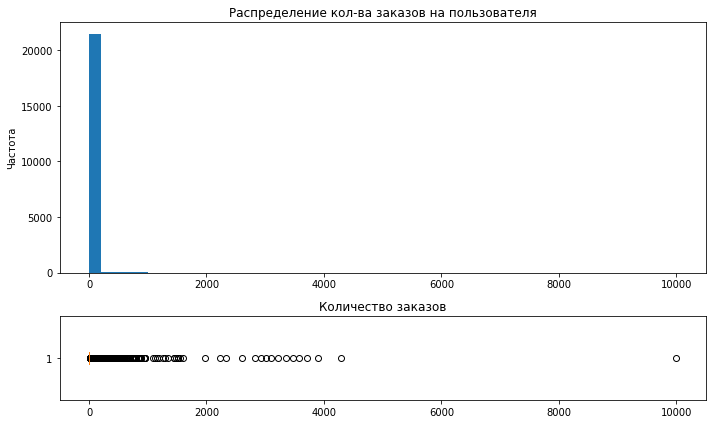

In [35]:
# Строим объединенные графики для анализа и наглядности по `total_orders`
fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,6),
    gridspec_kw={'height_ratios':[3,1]})
  
# boxplot
axes[1].boxplot(user_profile['total_orders'],vert=False)
axes[1].set_title('Количество заказов')

# histogram
axes[0].hist(user_profile['total_orders'],bins=50)
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение кол-ва заказов на пользователя')

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Наблюдается сильно скошенное вправо распределение по количеству заказов
* Основная масса пользователей - 75% сделали менее 5 заказов
* Найдено 2713 выбросов, что составляет почти 12,6% от общего числа, т.е. в случае фильтрации по IQR возможно потерять каждого 8-го пользователя, что сильно повлияет на общую статистику и анализ в дальнешем
* Выбросы не выглядят как ошибки, т.к. наблюдает плавный рост, за исключением единичного выброса в 9998 заказов.
* Значения выше 99 перцентиля - 152 заказа, составляют менее 1% пользователей и представляют собой отдлеьный сегмент с аномально высокой активностью.

Можно было бы офильтровать по 99 перцентелю, чтобы выявить массовых пользователей и проводить анализ по этому сегменту пользователей, но я считаю, что надо попробовать разделить пользователей на 2 сегмента: до 99 перцентиля (массовых) и остальных > 99 перцентиля (так называемых - влиятельных) и проанализировать данные сегменты по-отдельности. Возможно что-то интересное получится найти.</div>

In [36]:
orders_99 = user_profile['total_orders'].quantile(0.99)

# Проведем сегментацию пользователей
user_profile = user_profile.copy()
user_profile['orders_segment'] = np.where(
    user_profile['total_orders'] > orders_99,
    'influence_users_99',
    'mass_users_99'
)

power_users = user_profile[user_profile['orders_segment'] == 'power_users_99'].copy()
influence_users = user_profile[user_profile['orders_segment'] == 'influence_users_99'].copy()

segment_summary = (
    user_profile.groupby('orders_segment')
    .agg(users=('orders_segment', 'size'),
        min_orders=('total_orders','min'),
        median_orders=('total_orders','median'),
        mean_orders=('total_orders','mean'),
        max_orders=('total_orders','max'))
    .assign(share=lambda x: x['users'] / x['users'].sum())
    .sort_values('users', ascending=False)
)

print(f"Значение 99 перцентиля по количеству заказов = {orders_99: .0f}")
print(segment_summary)

Значение 99 перцентиля по количеству заказов =  152
                    users  min_orders  median_orders  mean_orders  max_orders  \
orders_segment                                                                  
mass_users_99       21386           1              2     6.425044         152   
influence_users_99    215         153            326   670.744186        9998   

                       share  
orders_segment                
mass_users_99       0.990047  
influence_users_99  0.009953  


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* В сегменте `mass_users` типичный пользователей делает 1-2 заказа, среднее немного выше медианы - значит умеренный правый хвост, распределение адекватное, без экстремальных значений
* В сегменте `influence_users`: пользователи каридально отличаются по поведению. Медиана в 160 раз выше, чем у массовых пользователей. Есть пользователи с тысячами заказов.

*Ключевой вывод: Выбросы по количеству заказов не являются ошибками данных. Они формируют отдельный, малочисленный, но поведенчески устойчивый сегмент пользователей. Можно в дальнейшем попробовать проанализировать влияние `infuence_users` на вклад в выручку, долю заказов.* </div>



In [37]:
# 99 перцентиль по заказам и сегмент
orders_99 = user_profile['total_orders'].quantile(0.99)

user_profile = user_profile.copy()
user_profile['orders_segment'] = np.where(
    user_profile['total_orders'] > orders_99,
    'influence_users_99',
    'mass_users_99'
)

# оценка total revenue на пользователя (раз в user_profile нет total revenue)
user_profile['total_revenue_rub_approx'] = (
    user_profile['total_orders'] * user_profile['avg_revenue_rub']
)

# Вклад сегментов в выручку и заказы
revenue_summary = (
    user_profile
    .groupby('orders_segment', as_index=False)
    .agg(
        users=('user_id', 'size'),
        orders=('total_orders', 'sum'),
        revenue=('total_revenue_rub_approx', 'sum'),
        rpu=('total_revenue_rub_approx', 'mean')  # выручка на пользователя
    )
    .assign(
        aov=lambda x: x['revenue'] / x['orders'],  # средний чек по сегменту
        users_share=lambda x: x['users'] / x['users'].sum(),
        orders_share=lambda x: x['orders'] / x['orders'].sum(),
        revenue_share=lambda x: x['revenue'] / x['revenue'].sum(),
    )
    .sort_values('revenue', ascending=False)
)

# красивый вывод (если в ноутбуке)
(
    revenue_summary
    .style
    .format({
        'users': '{:,.0f}',
        'orders': '{:,.0f}',
        'revenue': '{:,.1f}',
        'rpu': '{:,.1f}',
        'aov': '{:,.1f}',
        'users_share': '{:.1%}',
        'orders_share': '{:.1%}',
        'revenue_share': '{:.1%}',
    })
    .set_properties(**{'text-align': 'right'})
    .set_properties(subset=['users_share', 'orders_share', 'revenue_share'],
                    **{'font-weight': 'bold'})
)    

,orders_segment,users,orders,revenue,rpu,aov,users_share,orders_share,revenue_share
0,influence_users_99,215,"144,210","77,433,910.8","360,157.7",537.0,1.0%,51.2%,51.1%
1,mass_users_99,"21,386","137,406","74,155,510.8","3,467.5",539.7,99.0%,48.8%,48.9%


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* **1%** пользователей совершают более **51%** заказов и они же формируют **51%** всей выручки
* Обнаружена огромная разница в средней выручке на пользователя: у `influence_users` = **360 тыс руб**, у `mass_users` = **3 тыс руб**
* При этом средний чек почти одинаковый: 537 руб и 539 руб. Поэтому разница в выручке не из-за чека, а из-за частоты покупок.

**Общий вывод: `Influence_users` - это клиенты с отдельным типом поведения, требующие отдельного анализа. В дальнейшем рекомендуется исключать их из A/B тестов и отдлеьно анализировать. Скорее всего к ним относятся корпоративные клиенты, реселлеры, партнерские аккаунты.</div>



In [38]:
print('\n\nПоказатели поля avg_tickets')
print(user_profile['avg_tickets'].describe())
Q1 = user_profile['avg_tickets'].quantile(0.25)
Q3 = user_profile['avg_tickets'].quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = user_profile[user_profile['avg_tickets'] > high]

print(f"99 процентиль = {user_profile['avg_tickets'].quantile(0.99)}")
print(f'IQR=[{Q3:.0f}] -> границы выбросов:  > {high:.0f}')
print(f'Выбросов найдено: {outliers.shape[0]} ({outliers.shape[0]/user_profile.shape[0]:.2%})')



Показатели поля avg_tickets
count    21601.000000
mean         2.747136
std          0.912093
min          1.000000
25%          2.000000
50%          2.750000
75%          3.120000
max          6.000000
Name: avg_tickets, dtype: float64
99 процентиль = 5.0
IQR=[3] -> границы выбросов:  > 5
Выбросов найдено: 669 (3.10%)


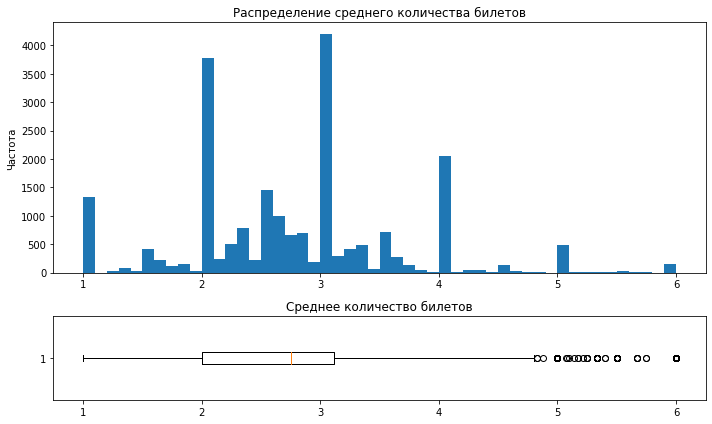

In [39]:
# Строим объединенные графики для анализа и наглядности по `avg_tickets`
fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,6),
    gridspec_kw={'height_ratios':[3,1]})
  
# boxplot
axes[1].boxplot(user_profile['avg_tickets'],vert=False)
axes[1].set_title('Среднее количество билетов')

# histogram
axes[0].hist(user_profile['avg_tickets'],bins=50)
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение среднего количества билетов')

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Пользователи в среднем покупают **2-3 билета** за заказ, редкие значения выпадают на **5 и 6 билетов**
* Среднее примерно равно медиане, т.е. распределение вполне себе устойчивое
* Выбросы составляют всего **3%**, значения логичный, даже покупка 5-6 билетов является нормой, к примеру, для больших компаний (друзей) или семей

*Ключевой вывод: в связи с отсутствием аномалий, без выраженных экстремальных значений и наличии устойчивых данных можно не проводить дополнительную обработку данных, опираясь на медиану или квартильные значения.* </div>

In [40]:
print('\n\nПоказатели поля avg_days_between')
print(user_profile['avg_days_between'].describe())
Q1 = user_profile['avg_days_between'].quantile(0.25)
Q3 = user_profile['avg_days_between'].quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = user_profile[user_profile['avg_days_between'] > high]

print(f"99 процентиль = {user_profile['avg_days_between'].quantile(0.99)}")
print(f'IQR=[{Q3:.0f}] -> границы выбросов: > {high:.0f}')
print(f'Выбросов найдено: {outliers.shape[0]} ({outliers.shape[0]/user_profile.shape[0]:.2%})')



Показатели поля avg_days_between
count    13419.000000
mean        15.987910
std         22.436556
min          0.000000
25%          1.000000
50%          8.120000
75%         20.750000
max        148.000000
Name: avg_days_between, dtype: float64
99 процентиль = 113.0
IQR=[21] -> границы выбросов: > 50
Выбросов найдено: 988 (4.57%)


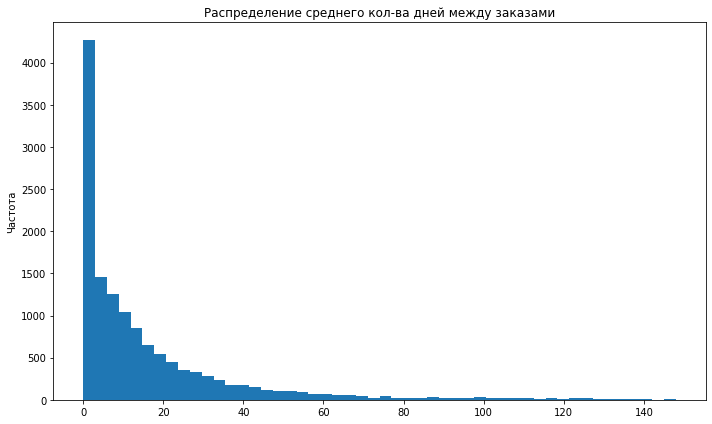

In [41]:
# Строим histogram для анализа и наглядности по `avg_days_between`
fig, ax = plt.subplots(figsize=(10,6))
  
# histogram
ax.hist(user_profile['avg_days_between'],bins=50)
ax.set_ylabel('Частота')
ax.set_title('Распределение среднего кол-ва дней между заказами')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Разброс среднего промежутка между заказами (в днях)')

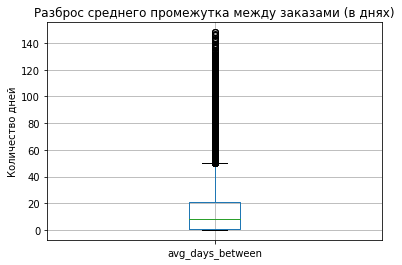

In [42]:
# Строим boxplot для анализа и наглядности по `avg_days_between

boxplot = user_profile[['avg_days_between']].boxplot()
boxplot.set_ylabel('Количество дней')
boxplot.set_title('Разброс среднего промежутка между заказами (в днях)')

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Отмечается резко скошенное вправо распределение, то подтверждается тем, что среднее больше медианы. Ввиден длинных "хвост" до **150 дней**
* Медиана составляет **8-9 дней**, что в целом является типичным поведением пользователей
* Большинство пользователей совершают повторный заказ в течение **1-3 недель**, при этом небольшая доля возвращается спустя несколько месяцев. 
* Значения в хвосте не являются аномалиями, а отражают реальное поведение пользователей, поэтому не должны быть исключены из анализа.м

---
<a class='anchor' id="link12"></a>
### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.


<a class='anchor' id="link13"></a>
#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---
<a class='anchor' id="link14"></a>
**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [43]:
def segment_summary(df, column):
    seg = (
        df.groupby(column)
        .agg(users_count=('user_id', 'nunique'))
        .reset_index()
        .sort_values('users_count', ascending=False))
    seg['users_share'] = (seg['users_count'] / seg['users_count'].sum() *100).round(2)
    return seg

In [44]:
# Группируем пользователей по типу их первого мероприятия

event_type_seg = segment_summary(user_profile,'first_event_type')
event_type_seg.style.format({'users_share': '{:.1f}%'})

,first_event_type,users_count,users_share
2,концерты,9500,44.0%
1,другое,5328,24.7%
5,театр,4349,20.1%
4,стендап,1134,5.2%
3,спорт,776,3.6%
0,выставки,417,1.9%
6,ёлки,97,0.5%


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Распределение неравномерное, есть ярко выраженные лидеры: 
    * концерты - **44%** - ключевой сегмент, почти половина всей аудитории, являетя основным драйвером пользовательской базы
    * другое - **24,6%** - большая доля, но сегмент размытый, не совсем понятно, что сюда входит, поэтому луше уточнить, чтобы понять поведение пользователей внутри него
    * театр - **20,1%** - крупный сегмент, возможно с потенциалом для вовлеченности и повторными покупками
    * остальные сегменты: стендап, спорт, выставки и елки - малочисленные сегменты, возможно связанные с сезонностью (некоторые)
* Пользователи сконцентрированы в **3х** сегментах, которые суммарно дают **89%** всей аудитории. Остальные сегменты не оказывают значимого влияния на общую структуру

*Рекомендации: фокус для маркетинга - концерты и театр как основные точки входа пользователей. необходимо детализировать сегмент "другое", возможно он скрывает перспективные категории, тестировать рост малочисленных сегментов через персональные рекомендации и акции, учитывать сезонность при планировании аналитики и кампаний.*</div>

In [45]:
# Группируем по типу устройства, с которого совершена первая покупка
device_type_seg = segment_summary(user_profile,'first_device')
device_type_seg.style.format({'users_share': '{:.1f}%'})


,first_device,users_count,users_share
1,mobile,17922,83.0%
0,desktop,3679,17.0%


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Распределение неравномерное: пользователи предпочитают первую покупку с мобильных устройств - 93%, компьютер используется значительно реже - 17%</div>

In [46]:
# Группируем по региону проведения мероприятия из первого заказа (топ-5 регионов)
region_seg = segment_summary(user_profile,'first_region')
region_seg.head(5).style.format({'users_share': '{:.1f}%'})


,first_region,users_count,users_share
23,каменевский регион,7110,32.9%
60,североярская область,3837,17.8%
77,широковская область,1263,5.8%
45,озернинский край,689,3.2%
41,малиновоярский округ,547,2.5%


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Распределение неравномерное: топ-2 региона дают более **50%** всей аудитории, остальные регионы представлены значительно слабее. * Почти каждый третий пользователь совершает первый заказ в Каменевском регионе (33%)
* Второй по значимости регион - Североярская область - **18%**, но с заметным отставанием от лидера

*Результаты анализа показывают, что имеется географическая зависимость спроса и необходимость фокусироваться именно на них*</div>

In [47]:
# Группируем по билетному оператору, продавшему билеты на первый заказ (топ-7)
first_service_seg = segment_summary(user_profile,'first_service')
first_service_seg.head(7).style.format({'users_share': '{:.1f}%'})


,first_service,users_count,users_share
3,билеты без проблем,5001,23.1%
19,лови билет!,2864,13.3%
22,мой билет,2802,13.0%
4,билеты в руки,2591,12.0%
23,облачко,2233,10.3%
7,весь в билетах,1332,6.2%
20,лучшие билеты,1194,5.5%


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Распределение неравномерное: топ-5 операторов суммарно привлекают более 70% пользователей, при этом явного лидера среди них нет</div>

---
<a class='anchor' id="link15"></a>
**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [75]:
def return_by_segment(
    df: pd.DataFrame,
    segment_column: str,
    top_n: int = 10,
    add_other: bool = True
):
    # защита от ошибок по колонкам
    required = {'user_id', 'is_two', segment_column}
    missing = required - set(df.columns)
    if missing:
        raise KeyError(f"В df нет колонок: {missing}")

    total_users = df['user_id'].nunique()

    agg = (
        df.groupby(segment_column)
          .agg(
              users=('user_id', 'nunique'),
              return_rate=('is_two', 'mean')   # доля вернувшихся (0..1)
          )
          .sort_values('users', ascending=False)
    )

    # приводим типы и переводим в проценты
    agg['users'] = agg['users'].astype(int)
    agg['return_rate'] = (agg['return_rate'] * 100).round(1)

    # если сегментов больше top_n — показываем top + "ОСТАЛЬНЫЕ"
    if len(agg) > top_n:
        top = agg.head(top_n).copy()
        rest = agg.iloc[top_n:].copy()

        covered_users = int(top['users'].sum())
        covered_pct = covered_users / total_users * 100
        not_covered_pct = 100 - covered_pct

        print(f"Показаны top-{top_n} сегментов по числу пользователей.")
        print(f"Покрытие: {covered_pct:.1f}% пользователей ({covered_users} из {total_users}).")
        print(f"За пределами обзора: {not_covered_pct:.1f}% пользователей ({total_users - covered_users} из {total_users}).")

        if add_other and len(rest) > 0:
            other_users = int(rest['users'].sum())
            # взвешенное среднее return_rate по числу пользователей
            other_return_rate = ((rest['return_rate'] * rest['users']).sum() / other_users).round(1)

            top.loc['ОСТАЛЬНЫЕ'] = [other_users, other_return_rate]

        return top

    # если сегментов мало — показываем всё
    print(f"Показаны все сегменты: {len(agg)} (100% пользователей).")
    return agg

In [49]:
def plot_return_rate(
    df,
    segment_name:str,
    overall_mean:float,
    title:str
):
    plot_df = df.sort_values('return_rate')
    
    offset = plot_df['return_rate'].max() * 0.01 
    
    fig, ax = plt.subplots(figsize=(10,0.45 * len(plot_df) + 1.5))
    
    # цвета - выше среднего - акцент, ниже среднего - более блендные
    colors = np.where(
        plot_df['return_rate'] >= overall_mean,
        '#1f77b4',
        '#c7d4e2')
    
    bars = ax.barh(
        plot_df.index.astype(str),
        plot_df['return_rate'],
        color=colors)
       
    # линия среднего по выборке
    ax.axvline(
        overall_mean,
        color='#d62728',
        linestyle='--',
        linewidth=2,
        label=f'Среднее по выборке: {overall_mean:.1f}%'
    )
    
          # подписи значений
    for i, (idx, row) in enumerate(plot_df.iterrows()):
        ax.text(
        row['return_rate'] + offset,
        i,
        f"{row['return_rate']:.1f}%",
        va='center',
        fontsize=9
    )
                 
             
        ax.set_xlabel('Доля пользователей, %')
        ax.set_ylabel(segment_name)
        ax.set_title(title)
        ax.legend()
        
        plt.tight_layout()
        plt.show()
        plt.close(fig)
        return None
        
        
overall_return_rate = user_profile['is_two'].mean()*100    

In [50]:
first_device_return = return_by_segment(user_profile, 'first_device', top_n=10)
first_device_return.style.format({'return_rate': '{:.1f}%'})


Показаны все сегменты: 2 (100% пользователей).


,users,return_rate
first_device,,
mobile,17922,61.3%
desktop,3679,63.7%


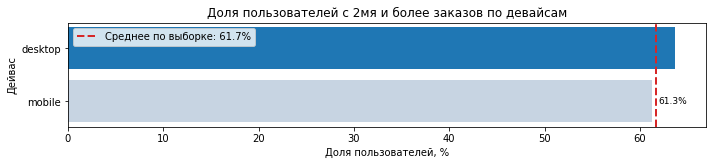

In [51]:
plot_return_rate(
    first_device_return,
    segment_name='Дейвас',
    overall_mean=overall_return_rate,
    title='Доля пользователей с 2мя и более заказов по девайсам'
)       

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* `Desktop`-аудитория меньше, но более склонна к повтортным покупкам по сравнии с `mobile` пользователями

*P.S. Комментарий для этого и графиков ниже: я НЕ СМОГЛА побороть код и сделать так, чтобы на графике отображались подписи данных напротив каждого столбца. Прошу прощенье. Я потратила на это около 3х часов, пробовала разные варианты :(*</div>

In [52]:
# Анализ по региону
region_return = return_by_segment(user_profile, 'first_region', top_n=10)
region_return.style.format({'return_rate': '{:.1f}%'})

Показаны top-10 сегментов по числу пользователей.
Покрытие: 72.3% пользователей (15626 из 21601).
За пределами обзора: 27.7% пользователей (5975 из 21601).


,users,return_rate
first_region,,
каменевский регион,7110.000000,62.5%
североярская область,3837.000000,64.7%
широковская область,1263.000000,65.2%
озернинский край,689.000000,55.4%
малиновоярский округ,547.000000,56.9%
светополянский округ,478.000000,66.9%
травяная область,467.000000,62.1%
речиновская область,452.000000,64.8%
яблоневская область,419.000000,59.9%


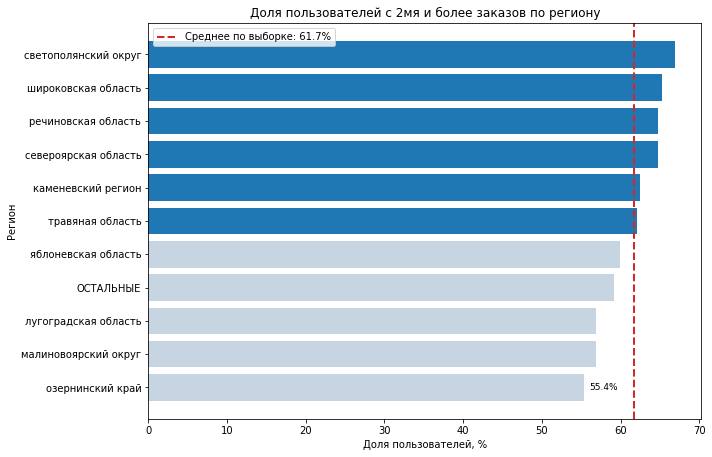

In [53]:
plot_return_rate(
    region_return,
    segment_name='Регион',
    overall_mean=overall_return_rate,
    title='Доля пользователей с 2мя и более заказов по региону'
)       

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Лучшими регионами по доле возврата являются Светополянский округ, Широковская область, Печиновская область и Североярская область, что указывает на сильные локационные рынки.
* Категория "ОСТАЛЬНЫЕ", которая составляет **28%** от общего числа пользователей находится за пределами ниже среднего, что в целом не влияет на топовые регионы</div>

In [54]:
first_event_return = return_by_segment(user_profile, 'first_event_type', top_n=10)
first_event_return.style.format({'return_rate': '{:.1f}%'})

Показаны все сегменты: 7 (100% пользователей).


,users,return_rate
first_event_type,,
концерты,9500,62.1%
другое,5328,60.1%
театр,4349,64.1%
стендап,1134,61.4%
спорт,776,55.5%
выставки,417,64.5%
ёлки,97,55.7%


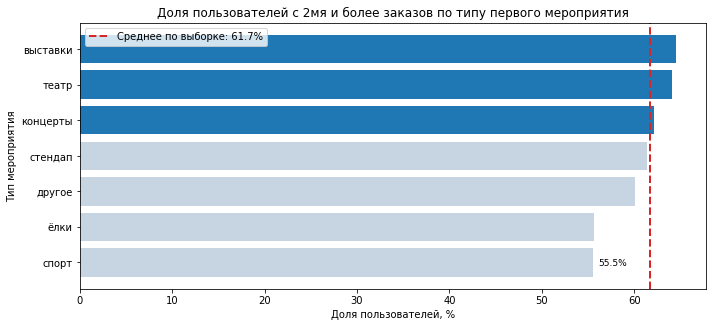

In [55]:
plot_return_rate(
    first_event_return,
    segment_name='Тип мероприятия',
    overall_mean=overall_return_rate,
    title='Доля пользователей с 2мя и более заказов по типу первого мероприятия'
)  

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Театр (64.1%), выставки(64.4%), концерты(62.1%) - самые сильные точки входа по отношению к пользователям, совершающих повторные покупки, их показателей выше среднего - **61.7%**
* Не смотря на то, что стендап по стастистике имеет показателей чуть ниже среднего - **61.4%**, тем не менее, этот тип мероприятия нужно также учитывать, т.к. занимает 4-е место по числу пользователей в целом
* Елки (55.7%) и спорт (55.5%) имеют показатель ниже среднего, скорее всего в виду сезонности и также загруженности людей в этот период. При этом сегмент елки - имеет по статистике меньше сотки пользователей, поэтому достоверно нельзя сказать, что статистика может быть применима с учетом небольшой выборки. Возможно для анализа необходимо использовать разные года и др.
* Культурные мероприятия (театр, выставки и концерты) формируют долгосрочную привычку, тогда как спорт и сезонные события - разовые </div>

In [56]:
first_service_return = return_by_segment(user_profile, 'first_service')
first_service_return.style.format({'return_rate': '{:.1f}%'})

Показаны top-10 сегментов по числу пользователей.
Покрытие: 90.0% пользователей (19448 из 21601).
За пределами обзора: 10.0% пользователей (2153 из 21601).


,users,return_rate
first_service,,
билеты без проблем,5001.000000,60.5%
лови билет!,2864.000000,61.9%
мой билет,2802.000000,59.5%
билеты в руки,2591.000000,63.6%
облачко,2233.000000,62.0%
весь в билетах,1332.000000,63.7%
лучшие билеты,1194.000000,61.7%
прачечная,601.000000,63.2%
край билетов,468.000000,66.0%


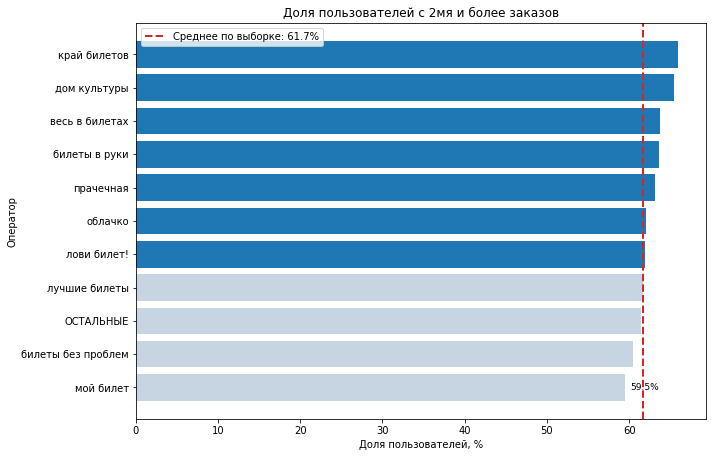

In [57]:
plot_return_rate(
    first_service_return,
    segment_name='Оператор',
    overall_mean=overall_return_rate,
    title='Доля пользователей с 2мя и более заказов'
)  

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Кокнретные операторы существенно влияют на повторые заказы: в топ входят Край билетов (66%), Дом культуры (65.5%), Весь в билетах (63.7%), Билеты в руки (63.8%) и Прачечная (63.2%)
* Ниже среднего: Билеты без проблем - 60.5% и Мой билет - 58.5%

**Важное наблюдение**: при этом разброс между операторами достигает **7-8 процентных подпунктов**, что в данном случае означает, что **каждый 12-14 пользователь** дополнительно возвращается у одного оператора по сравнению с другим. В масштабе тысяч пользователей, что актуально в нашем случае - это сотни дополнительных повторных заказов. Такой разброс говорит о том, что оператор очень важен и влияет на уровень доверия пользователей и вероятность того, что пользователей вернется на Афишу повторно.
</div>

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**ИТОГОВЫЙ ВЫВОД:**
* В среднем **61,7** пользователей совершают **2 и более заказов**;
* Выявлены "успешные точки входа", у которых % возврата выше **61.7%**:
    * `desktop` - пользователей;
    * пользователи из ряда регионов: Светополянский округ, Широковская область, Речиновская область, Североярская область
    * типы мероприятий: театр, выставки, концерты;
    * отдельные операторы: Дом культуры, Край билетов и др.
* Культурные мероприятия (театр, выставки и концерты) формируют долгосрочную привычку, тогда как спорт и сезоенные события - разовые     
* При этом спортивные и сезонные меропрития, а также пользователи, вошедшие через `mobile` чаще приводя к разовым покупкам
* Важным является то,, что первый билетный оператор работает как фильтр лояльности у пользователей и оказывает значительное влияние на дальнейшее их поведение</div>

---
<a class='anchor' id="link16"></a>
**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

In [58]:
# Проверяем гипотезу #1
df = user_profile.copy()

df['is_repeat'] = (df['total_orders'] >1).astype(int)
                   
hyp_1 = df[df['first_event_type'].isin(['спорт','концерты'])]                   

repeat_rates = ((hyp_1.groupby('first_event_type')['is_repeat'].mean())*100).round(1)

print("Проверка гипотезы №1")
print("="*60)
repeat_rates_tbl = (
    repeat_rates
    .rename('Доля повторных заказов, %')
    .to_frame()
    .sort_values('Доля повторных заказов, %', ascending=False)
    .style
    .format('{:.1f}%')
)

repeat_rates_tbl


Проверка гипотезы №1


,"Доля повторных заказов, %"
first_event_type,
концерты,62.1%
спорт,55.5%


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
*  Для концертов доля повторных заказов составляет **62.1%**, для спортивных мероприятий - **55.5%**, т.е. гипотеза **не подтверждается**: пользователи, совершившие первый заказ на спортивные мероприятия совешрают повторный заказ реже, чем пользователи, оформившие свой первый заказ на концерты. 
</div>

In [59]:

region_stats = (
    df
    .groupby('first_region')
    .agg(
        users=('user_id','count'),
        repeat_rate=('is_repeat', 'mean')
    )
)

median_users = region_stats['users'].median()

region_stats['activity_group'] = np.where(
    region_stats['users'] >= median_users,
    'high',
    'low'
)

high_activity = ((region_stats[region_stats['activity_group'] == 'high']['repeat_rate'].mean())*100).round(1)
low_activity = ((region_stats[region_stats['activity_group'] == 'low']['repeat_rate'].mean())*100).round(1)



print("Проверка гипотезы №2")
print("="*60)
result_table = pd.DataFrame({
    'Группа регионов': ['Активные','Менее активные'],
    'Доля повторных заказов: %': [
        high_activity,
        low_activity
    ]
})

result_table


Проверка гипотезы №2


,Группа регионов,Доля повторных заказов: %
0,Активные,59.7
1,Менее активные,52.7


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
*  Для каждого региона было посчитано:
    * количество пользователей `users`;
    * доля пользователей с повторными заказами `repeat_rate`. 
* В качестве порога активности была использована медиана количества пользователей по регионам (для исклчения влияния выбросов на данные) и регионы были разделены на 2 группы:
    * активные регионы - количество пользователей не меньше медианы;
    * менее активные регионы - количество пользователей меньше медианы
 
**ОБЩИЙ ВЫВОД:** в регионах с высокой активностью пользователей доля повторных заказов выше, чем в менее активных регионах. В активных регионах повторные заказы совершают почти **60%** пользователей, тогда как в менее активных - **53%**. Разница в 7 п.п. указывает на положительную связь между активностью региона и вероятностью повторных заказов, что **подтверждает выдвинутую гипотезу**    
</div>

---
<a class='anchor' id="link17"></a>
#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---
<a class='anchor' id="link18"></a>
**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [60]:
# Разделяем пользователей на две группы
one_time_users = user_profile[user_profile['total_orders'] == 1]['avg_revenue_rub']
returning_users = user_profile[user_profile['total_orders'] >= 2]['avg_revenue_rub']

print(f"Пользователи, совершившие 1 заказ: {len(one_time_users)} чел.")
print(f"Вернувшиеся пользователи: {len(returning_users)} чел.")

Пользователи, совершившие 1 заказ: 8269 чел.
Вернувшиеся пользователи: 13332 чел.


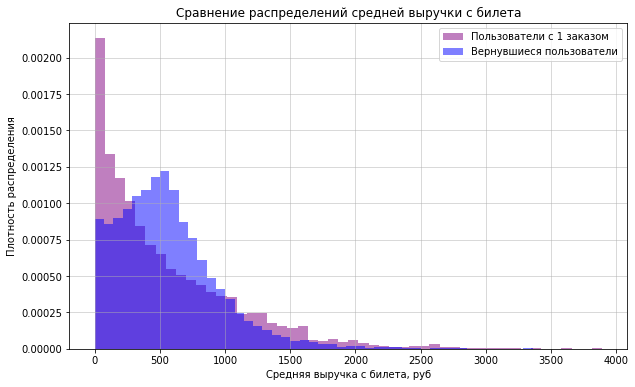

Сравнение распредлений средней выручки с билета
       Пользователи с 1 заказом  Вернувшиеся пользователи
count                   8269.00                  13332.00
mean                     552.50                    557.74
std                      538.89                    389.24
min                        0.07                      0.35
25%                      139.48                    278.57
50%                      381.67                    503.68
75%                      812.46                    748.85
max                     3891.66                   3575.01


In [61]:
# Дополнительная визуализация - совмещенные распределения
plt.figure(figsize=(10, 6))

plt.hist(one_time_users, bins=50, alpha=0.5, color='purple', 
         label='Пользователи с 1 заказом', density=True)
plt.hist(returning_users, bins=50, alpha=0.5, color='blue', 
         label='Вернувшиеся пользователи', density=True)

plt.title('Сравнение распределений средней выручки с билета')
plt.xlabel('Средняя выручка с билета, руб')
plt.ylabel('Плотность распределения')
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()


# Дополнительная статистика для интерпретации

print("Сравнение распредлений средней выручки с билета")
print("="*60)
stats_df = pd.DataFrame({
    'Пользователи с 1 заказом': one_time_users.describe(),
    'Вернувшиеся пользователи': returning_users.describe()
})
print(stats_df.round(2))

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
*  Для пользователей с **1 заказом**:
    * основная концентрация примерно в диапазоне **0-400** руб, медиана - **382** руб.
    * распределение сильно скошено вправо, что говорит о том, что большинство разовых клиентов покупают дешевые билеты или делают миниальные заказы;
* Пользователи с **повторными заказами**:
    * основная концентрация примерно в диапазоне **200 - 500** руб., медиана - 504 руб;
    * распределение более компактное, меньше эксптремально низких значений, т.е. вернувшиеся пользователи чаще покупают билеты дороже среднего

*Различия между группами имеются:*
* У пользователей с повторными заказами распределение средней выручки смещено в сторону более высоких значений
* У разовых пользователей заметный пик вблизи нуля, которого почти нет у вернувшихся пользователей
* Средние значения похожи, (553 руб и 558 руб), однако медиана и квартильные диапазоны выше у вернувшихся, что говорит о более стабильных и дорогих покупках    
    
**Рекомендация для бизнеса:**
    дорогие покупки в обеих группах не гарантируют возврат: мы видим по графика в обеих группах длинных правых хвост, хотя у разовых пользователей он сильнее виляет на стаистику (что в целом логично). это означает что единичные дорогие заказы сами по себе не приводят к удержанию и лояльность формируется не за сет цены билета.
Фокус удержания стоит смещать на пользователей с чеком выше медианы, а не только на самых дорогих клиентов.
    Для разовых покупателей имеется смысл предлагать стимуля длы повторной покупки (скидки, персональные рекомендации), снижать барьеры ко второй покупке. Для вернувшихся пользователей - усиливать прогарммы лояльности, т.к. они уже демонстрируют более постоянную экономику покупок    
    
      
</div>

---
<a class='anchor' id="link19"></a>
**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [62]:
users_2_4 = user_profile.loc[user_profile['total_orders'].between(2,4), 'avg_revenue_rub'].dropna()
users_5 = user_profile.loc[user_profile['total_orders'] >= 5, 'avg_revenue_rub'].dropna()

print(f"Пользователи 2-4 заказа: {len(users_2_4)} чел.")
print(f"Пользователи 5+ заказов: {len(users_5)} чел.")

Пользователи 2-4 заказа: 7074 чел.
Пользователи 5+ заказов: 6258 чел.


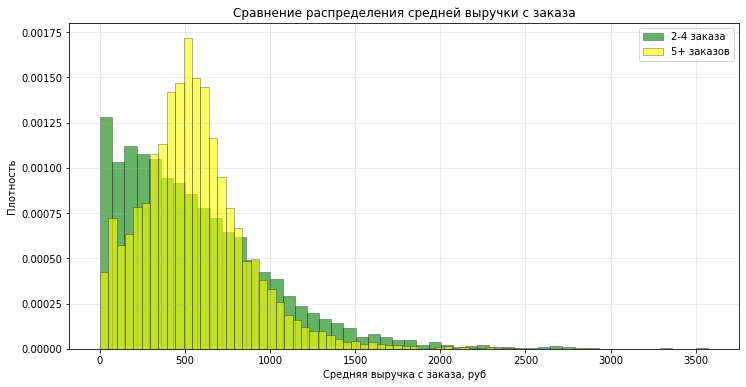

Сравнение сегментов пользователей
       Пользователи с 2-4 заказами  Пользователи с 5 и более заказами
count                     7074.000                           6258.000
mean                       561.124                            553.917
std                        444.913                            314.660
min                          2.420                              0.350
25%                        220.568                            347.135
50%                        470.760                            524.930
75%                        798.268                            710.630
max                       3575.010                           2462.880


In [63]:
# Дополнительная визуализация - совместная гистограмма с абсолютными значениями
plt.figure(figsize=(12, 6))
# Строим гистограммы с плотностью вероятности
plt.hist(users_2_4, bins=50, alpha=0.6, color='green', 
         label='2-4 заказа', density=True, edgecolor='black', linewidth=0.5)

plt.hist(users_5, bins=50, alpha=0.6, color='yellow', 
         label='5+ заказов', density=True, edgecolor='black', linewidth=0.5)
plt.xlabel('Средняя выручка с заказа, руб')
plt.ylabel('Плотность')
plt.title('Сравнение распределения средней выручки с заказа')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Выводим статистику

print("Сравнение сегментов пользователей")
print("="*60)

stats_df = pd.DataFrame({
    'Пользователи с 2-4 заказами': users_2_4.describe(),
    'Пользователи с 5 и более заказами': users_5.describe()
})
print(stats_df.round(3))

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Различия есть, но они незначительны:
    * средние значения выручки близки 561 руб у пользователей с 2-4 заказами и 554 руб у пользователей с заказами 5+. Существенного различия не наблюдается
    * медиана выше упользователей с 5+ заказами - это говорит о том, что типичный пользователь с бОльшим числом заказов тратит больше за заказ, чем пользователь с 2-4 заказами.
    * у пользователей с 5+ заказов ниже стандартное отклонение, меньше экстремальных значений и распределение более компактное.
    
**Рекомендация для бизнеса:**
* Лучше сфокусироваться на перевод пользователей из сегмента 2-4 заказов в 5+ заказов, т.к. пользователи с 2-4 заказами уже демонстрируют сопоставимую среднюю выручку, но их поведение менее устойчиво. это ключевая точка роста.
* В качестве рекомендаций можно предложить:
    * персональные предложения после 3-4 заказа;
    * триггерные скидки или бонусы на следующий заказ;
    * напоминания и рекомендации на основе прошлых покупок;
    * т.к. у пользователей с 2-4 заказами больше низких значений средней выручки и длинный правый хвост можно также рекомендовать использование больших скидок на товары, которые будут закреплять низкий чек, а также использовать рекомендации в среднем ценовом диапазоне - 400-700 руб.
* Закрепление поведения пользователей с 5+ заказами, т.к. это лояльное ядро, которое необходимо удерживать:
    * разрабатывать программы лояльности (баллы, кешэбек, накопительыне скидки и рд.)
    ранний доступ к уникальным предложениям.
      
      
</div>

---
<a class='anchor' id="link20"></a>
**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [64]:
# Создаем сегменты по количеству билетов
bins = [1, 2, 3, 5, user_profile['avg_tickets'].max() + 1]
labels = ['1-2 билета', '2-3 билета', '3-5 билетов', '5+ билетов']
user_profile['tickets_segment'] = pd.cut(user_profile['avg_tickets'], bins=bins, labels=labels, right=False)

# Анализ сегментов
segment_stats = user_profile.groupby('tickets_segment').agg({
    'user_id': 'count',
    'total_orders': ['mean', lambda x: (x >= 2).mean()],
    'avg_revenue_rub': 'median'
}).round(2)

# Переименовываем столбцы
segment_stats.columns = ['total_users', 'avg_orders', 'repeat_rate', 'median_revenue']
segment_stats['repeat_rate'] = (segment_stats['repeat_rate'] * 100).round(1)
segment_stats['user_share'] = (segment_stats['total_users'] / len(user_profile) * 100).round(1)

print("Сегменты по среднему количеству билетов в заказе")
print("="*50)
print(segment_stats)

Сегменты по среднему количеству билетов в заказе
                 total_users  avg_orders  repeat_rate  median_revenue  \
tickets_segment                                                         
1-2 билета              2399        2.75         51.0      207.000000   
2-3 билета              9539       24.66         74.0      464.100006   
3-5 билетов             8997        4.32         55.0      617.340027   
5+ билетов               666        1.38         19.0      696.419983   

                 user_share  
tickets_segment              
1-2 билета             11.1  
2-3 билета             44.2  
3-5 билетов            41.7  
5+ билетов              3.1  


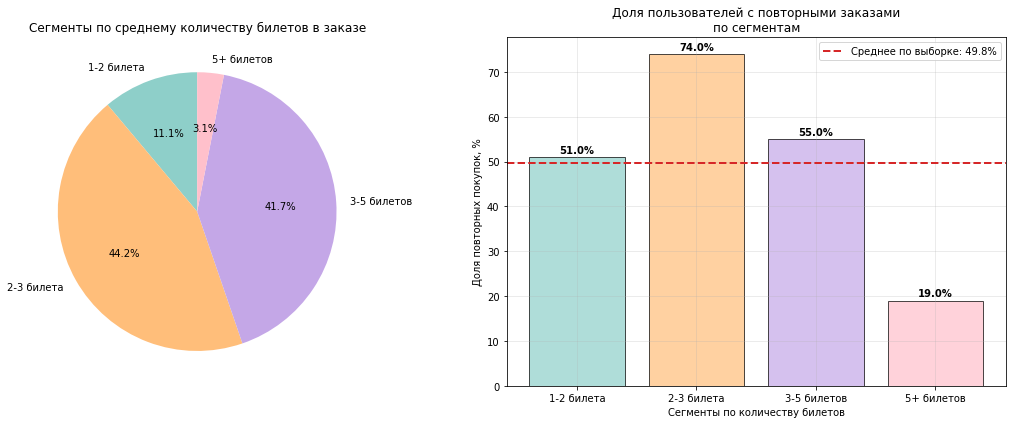

In [65]:
# считаем среднее по повторным покупкам
overall_mean = segment_stats['repeat_rate'].mean()

# Строим графики для наглядности
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Распределение пользователей по сегментам (круговая диаграмма)
colors = ['#8ECFC9', '#FFBE7A', '#C4A7E7', 'pink']
ax1.pie(segment_stats['total_users'], labels=segment_stats.index, 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Сегменты по среднему количеству билетов в заказе')

# График 2: Доля повторных покупок по сегментам (столбчатая диаграмма)
bars = ax2.bar(segment_stats.index, segment_stats['repeat_rate'], 
               color=colors, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Сегменты по количеству билетов')
ax2.set_ylabel('Доля повторных покупок, %')
ax2.set_title('Доля пользователей с повторными заказами\nпо сегментам')
ax2.grid(True, alpha=0.3)

# линия среднего по выборке
ax2.axhline(
    overall_mean,
    color='#d62728',
    linestyle='--',
    linewidth=2,
    label=f'Среднее по выборке: {overall_mean:.1f}%'
)
ax2.legend()

# Добавляем значения на столбцы
for bar, value in zip(bars, segment_stats['repeat_rate']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Распределение пользователей по сегментам неравномерное: на сегменты 2-3 билета (44%) и 3-5 билетов (42%) приходится 86% общего количества пользователей. Это говорит о том, что типичный пользователь все-таки покупает от 2 до 5 билетов за заказ в среднем.
* Наивысшая доля повторных покупок у сегмента 2-3 билета и составляет 74%, на 3-5 билетов - 55%, а у 5+ билетов - 19% (аномально низкое значение), при этом средний показатель составляет почти 50%. Можно сделать вывод, что для удержания стоит сфокусироваться на сегменте пользователей, покупающих 2-3 билета за заказ
* Сегмент 5+ билетов имеет самую высокую медианную выручку при минимуме доле повторных покупок. Скорее всего это разовые покупки (корпоративы, дни рождения и тд), а не утойчивое поведение пользователей.    
* Пользователи с 1-2 заказами имеют низкую медианную выручку и среднюю долю повторных заказов, что говорит о том, что у таких пользователей привычка еще не сформирована.    
    
**Рекомендация для бизнеса:**
* Сегмент пользователей, покупающих 2-3 билета - ключевой сегмент в связи с высокой долей повторных покупок, а также размеру сегмента в целом. Данный сегмент является основным драйвером роста долгосрочной прибыли. В качестве рекомендаций можно:
    * персональные рекомендации и напоминания о событиях;
    * небольшие скидки на покупку до 3-4 билетов;
    * основной фокус коммуникации черех mail, push и др.
* Сегмент пользователей 3-5 билетов имеет высокую медианную выручку и среднюю долю повторных покупок (55%). Является перспективным сегментов для увеличения выручки без потери лояльности. В качестве рекомендации можно дать:
    * предлагать пакентные предложения;
    * акцент сместить на удобствоЭ, а не на цену;
    тестировать предложения для компании или семьи.
* Сегмент пользователей 1-2 билета с низкой медианной выручкой и умеренной долей повторных покупок (51%) является перспективным сегментов и важно постараться как можно быстрее перевести его в сегмент пользователей 2-3 билетов. В качестве рекомендация можно дать:
    * снижение барьера ко второй покупке (бонусы, промокоды);
    * рекламировать ценность сервиса, его простоту, контент и тд</div>

---
<a class='anchor' id="link21"></a>
#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---
<a class='anchor' id="link22"></a>
**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [66]:
user_profile['first_order_dt'] = pd.to_datetime(user_profile['first_order_dt'])

user_profile['is_repeat'] = (user_profile['total_orders'] >=2).astype(int)

user_profile['first_weekday'] = user_profile['first_order_dt'].dt.day_name()

weekly_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
user_profile['first_weekday'] = pd.Categorical(
    user_profile['first_weekday'], 
    categories=weekly_order, 
    ordered=True
)

weekly_stats = (user_profile.groupby('first_weekday', observed=False)
                .agg(total_users=('user_id','count'),
                     repeat_rate=('is_repeat','mean'))
                .reset_index())

weekly_stats['repeat_rate_%'] = (weekly_stats['repeat_rate'] * 100).round(1)
weekly_stats['user_share_%'] = (weekly_stats['total_users'] / len(user_profile) * 100).round(1)

print("Распределение пользователей по дню первой покупки")
print("="*60)
display(weekly_stats)

Распределение пользователей по дню первой покупки


,first_weekday,total_users,repeat_rate,repeat_rate_%,user_share_%
0,Monday,2873,0.628959,62.9,13.3
1,Tuesday,3098,0.615236,61.5,14.3
2,Wednesday,3048,0.620407,62.0,14.1
3,Thursday,3104,0.600515,60.1,14.4
4,Friday,3257,0.602395,60.2,15.1
5,Saturday,3422,0.642314,64.2,15.8
6,Sunday,2799,0.608789,60.9,13.0


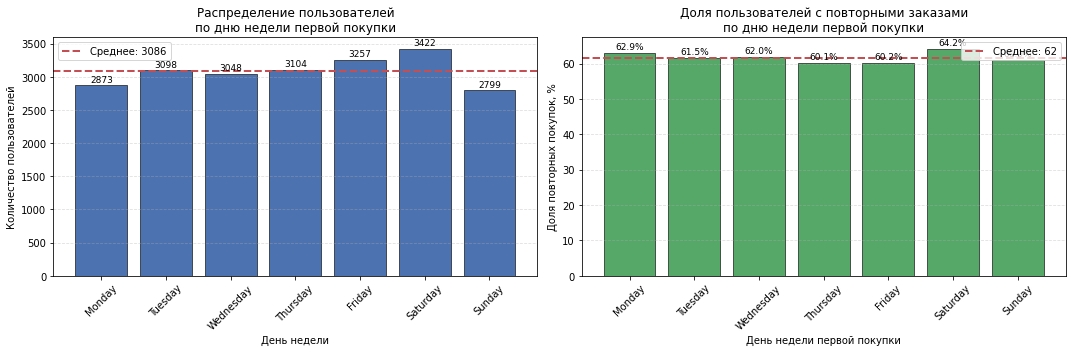

In [67]:
# Цвета
bar_color_users = '#4C72B0'    
bar_color_repeat = '#55A868'   
avg_line_color = '#C44E52'     

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Количество пользователей
bars1 = ax1.bar(
    weekly_stats['first_weekday'],
    weekly_stats['total_users'],
    color=bar_color_users,
    edgecolor='black',
    linewidth=0.6
)

avg_users = weekly_stats['total_users'].mean()
avg_repeat = weekly_stats['repeat_rate_%'].mean()
ax1.axhline(
    avg_users,
    color=avg_line_color,
    linestyle='--',
    linewidth=2,
    label=f'Среднее: {avg_users:.0f}'
)

ax2.axhline(
    avg_repeat,
    color=avg_line_color,
    linestyle='--',
    linewidth=2,
    label=f'Среднее: {avg_repeat:.0f}'
)

ax1.set_title('Распределение пользователей\nпо дню недели первой покупки', fontsize=12)
ax1.set_ylabel('Количество пользователей')
ax1.set_xlabel('День недели')
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.tick_params(axis='x', rotation=45)

for bar in bars1:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 20,
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Доля повторных покупок =====
bars2 = ax2.bar(
    weekly_stats['first_weekday'],
    weekly_stats['repeat_rate_%'],
    color=bar_color_repeat,
    edgecolor='black',
    linewidth=0.6
)


ax2.set_title('Доля пользователей с повторными заказами\nпо дню недели первой покупки', fontsize=12)
ax2.set_ylabel('Доля повторных покупок, %')
ax2.set_xlabel('День недели первой покупки')
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.4)
ax2.tick_params(axis='x', rotation=45)

for bar in bars2:
    value = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.5,
        f'{value:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Комментарий:**
* Доля пользователей с повторными заказами по дням недели колеблется в узком диапазоне от 60% до 64% при среднем значении в 61.7%.
* Максимальное значение наблюдается в субботу - 64%, минимальное - в четверг и пятницу - около 60%
    
**Общий вывод:** день недели первой покупки **не является** значимым фактором удержания клиентов 
          
</div>

---
<a class='anchor' id="link23"></a>
**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [68]:
group_2_4 = user_profile[
    (user_profile['total_orders'] >= 2) &
    (user_profile['total_orders'] <= 4)
]

group_5_plus = user_profile[
    user_profile['total_orders'] >= 5
]

days_stats = pd.DataFrame({
    '2–4 заказа': group_2_4['avg_days_between'].describe(),
    '5+ заказов': group_5_plus['avg_days_between'].describe()
}).round(2)

print("Среднее время между заказами")
print("="*60)
display(days_stats)

Среднее время между заказами


,2–4 заказа,5+ заказов
count,7074.00,6258.00
mean,21.32,9.60
std,28.44,7.86
min,0.00,0.00
25%,0.00,3.43
50%,9.00,7.82
75%,33.63,13.88
max,148.00,37.50


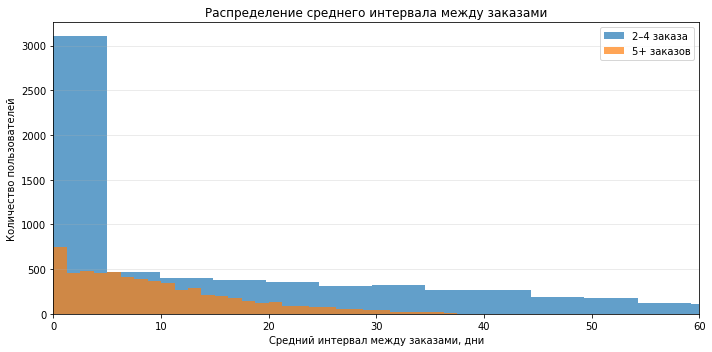

In [69]:
plt.figure(figsize=(10, 5))

plt.hist(
    group_2_4['avg_days_between'].dropna(),
    bins=30,
    alpha=0.7,
    label='2–4 заказа'
)

plt.hist(
    group_5_plus['avg_days_between'].dropna(),
    bins=30,
    alpha=0.7,
    label='5+ заказов'
)

plt.title('Распределение среднего интервала между заказами')
plt.xlabel('Средний интервал между заказами, дни')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# чтобы хвосты не "съедали" график
plt.xlim(0, 60)

plt.tight_layout()
plt.show()


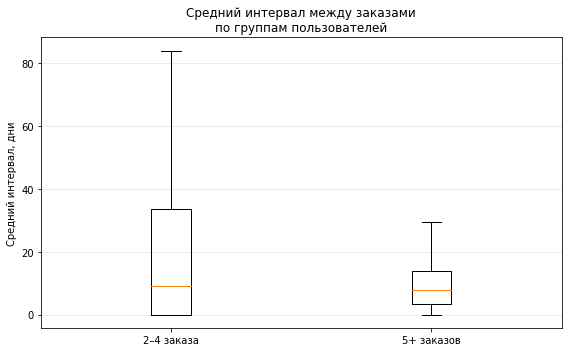

In [70]:
plt.figure(figsize=(8, 5))

plt.boxplot(
    [
        group_2_4['avg_days_between'].dropna(),
        group_5_plus['avg_days_between'].dropna()
    ],
    labels=['2–4 заказа', '5+ заказов'],
    showfliers=False
)

plt.title('Средний интервал между заказами\nпо группам пользователей')
plt.ylabel('Средний интервал, дни')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">
    
**Комментарий:**
* Пользователи с 2-4 заказами:
    * средний интервал - 21 день;
    * медиана - 9 дней;
    * у данной группы распределение сильно скошено вправо, длинный хвост до 150 дней и большое количество редких покупок;
    * по boxplot можно наблюдать значильный разброс IQR и высокая нестабильность интервалов.
* пользователи с 5 и более заказами:
    * средний интервал - почти 10 дней;
    * медиана - почти 8 дней;
    * распределение компактнее: большая концентрация значений в 0-15 дней, отсутствуют экстремально большие интервалы
    * по boxplot можно наблюдать меньший разброс IQR, соответственно более предсказуемое и понятное поведение.
* Пользователи с высокой частотой покупок совершают заказы примерно в 2 раза чаще и демонстрируют более высокий уровень удержания. Короткий и стабильный интервал между покупками является характерной чертой лояльных клиентов, тогда как длинные и нерегулярные интервалы связаны с более низкой вероятностью повторных заказов.
    
**Рекомендация для бизнеса:**
* Использовать средний интервал между заказами как ключевой индикатор рикска: 
    * ввести метрику по среднему интервалу и разделить клиентов на сегменты: менее 10 дней - лояльные, 10-20 дней - зона внимания, более 21 дня - группа риска;
* Запускать автоматич напоминания.ю использовать персонализацию (приглашать на конкретные мероприятия, или предлагать в определенном диапазоне цен мероприятия и др.)    
* Для перехода с заказов 2-4 на 5+ предлагать индивидуальные предложения: бонусы на следующий заказ, скидки с ограниченным сроком и др. Организовать быстрый доступ к избранному, давать рекомендации на основе предыдущих заказов
* Для пользователей с большим интервалом: более 21 дня предлагать реактивационные кампании, типа "вернись и получи...", ограничить частоту предложений, н оповысить их ценность.</div>

---
<a class='anchor' id="link24"></a>
#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---
<a class='anchor' id="link25"></a>
**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [71]:
df = user_profile.copy()

# целевая
target = 'total_orders'
assert target in df.columns, "В df нет столбца total_orders"

# оставим только нужные колонки 
use_cols = [
    'first_device', 'first_region', 'first_service', 'first_event_type',
    'avg_revenue_rub', 'avg_tickets', 'avg_days_between',
    target
]
use_cols = [c for c in use_cols if c in df.columns]
df = df[use_cols].replace([np.inf, -np.inf], np.nan)

# interval_cols — числовые признаки (phi_k будет корректнее)
interval_cols = df.select_dtypes(include='number').columns.tolist()

# ---------------------------
# 1) Общая phi_k матрица
# ---------------------------
phik_mat = df.phik_matrix(interval_cols=interval_cols)

# Корреляция признаков с total_orders
corr_with_orders = (phik_mat[target]
                    .drop(index=target, errors='ignore')
                    .sort_values(ascending=False)
                    .round(6)
                    .to_frame('correlation_with_orders'))

print("Корреляции признаков с total_orders")
print("="*60)
display(corr_with_orders)



Корреляции признаков с total_orders


,correlation_with_orders
first_region,0.125635
first_service,0.101257
avg_tickets,0.050957
avg_revenue_rub,0.021638
first_device,0.000000
first_event_type,0.000000
avg_days_between,0.000000


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">
    
**Комментарий:**
* Все значения низкий, поэтому линейная связь почти отсутсвует, это ожидаемо, т.к. `total_orders`  - дискретная величина с сильным перекосом, где много пользователей с 1 заказом. Поэтому дальнейшая разбивка на сегменты - абсолютно правильный шаг.    
</div>

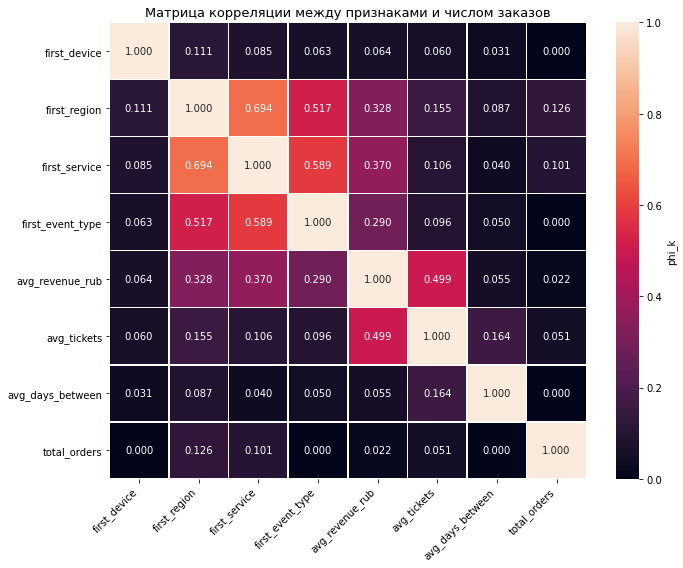

In [72]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    phik_mat,
    cmap="rocket",
    annot=True,
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={"label": "phi_k"},
    vmin=0,
    vmax=1
)

plt.title("Матрица корреляции между признаками и числом заказов", fontsize=13)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [73]:
# Создаём сегменты по total_orders

df['segment_1_order'] = (df[target] == 1).astype(int)
df['segment_2_4_orders'] = ((df[target] >= 2) & (df[target] <= 4)).astype(int)
df['segment_5_plus_orders'] = (df[target] >= 5).astype(int)

segment_cols = ['segment_1_order', 'segment_2_4_orders', 'segment_5_plus_orders']

# Phi_k: признаки -> сегменты

features = [c for c in df.columns if c not in [target] + segment_cols]

seg_results = {}

for seg in segment_cols:
    tmp = df[features + [seg]].copy()

    # список числовых интервальныз признаков в датафрейме
    tmp_interval = tmp.select_dtypes(include='number').columns.tolist()

    seg_mat = tmp.phik_matrix(interval_cols=tmp_interval)

    # столбец seg может быть исключён, если мало уникальных значений
    if seg not in seg_mat.columns:
        print(f"Сегмент {seg}: phi_k исключил столбец (мало уникальных значений). Пропускаем.")
        continue

    seg_to_feat = (seg_mat[seg]
                   .drop(index=seg, errors='ignore')
                   .sort_values(ascending=False)
                   .round(3))

    seg_results[seg] = seg_to_feat

# Таблица 
summary = pd.DataFrame(seg_results).fillna(0).round(3)
print("Корреляция признаков с сегментами по количеству заказов")
print("="*70)
display(summary)

Корреляция признаков с сегментами по количеству заказов


,segment_1_order,segment_2_4_orders,segment_5_plus_orders
avg_days_between,0.159,0.454,0.474
avg_revenue_rub,0.282,0.056,0.333
avg_tickets,0.719,0.389,0.532
first_device,0.027,0.000,0.032
first_event_type,0.033,0.018,0.027
first_region,0.079,0.026,0.087
first_service,0.060,0.019,0.069


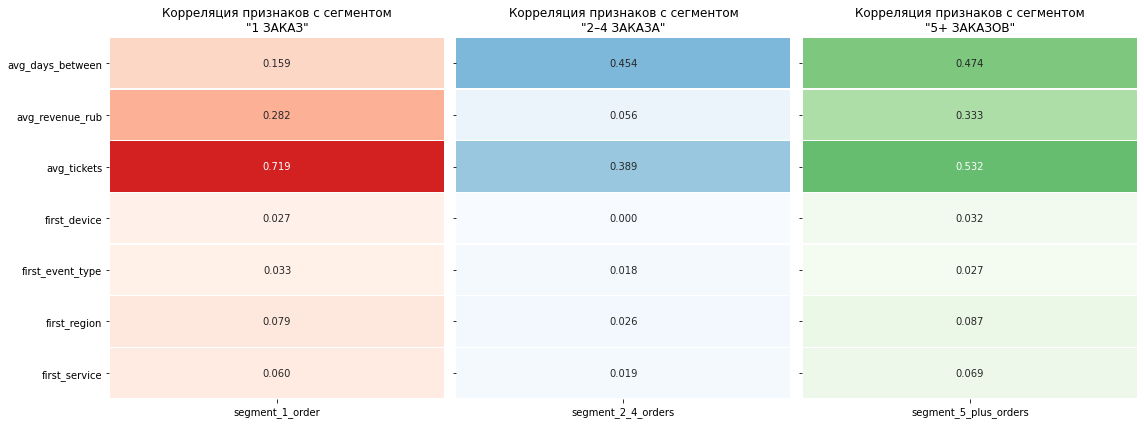

In [74]:
# Рисуем 3 heatmap по сегментам (вертикальные)
features_order = summary.index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

for ax, seg, cmap, title in zip(
    axes,
    segment_cols,
    ['Reds', 'Blues', 'Greens'],
    [
        'Корреляция признаков с сегментом\n"1 ЗАКАЗ"',
        'Корреляция признаков с сегментом\n"2–4 ЗАКАЗА"',
        'Корреляция признаков с сегментом\n"5+ ЗАКАЗОВ"'
    ]
):
    if seg not in summary.columns:
        ax.axis('off')
        continue   # <-- ВАЖНО: continue, не cont

    # Берём один столбец и делаем его "вертикальной теплокартой"
    data = summary.loc[features_order,[seg]]

    sns.heatmap(
        data,
        ax=ax,
        cmap=cmap,
        annot=True,
        fmt=".3f",
        cbar=False,
        vmin=0, vmax=1,
        linewidths=0.5
    )

    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">
    
**Комментарий:**
* Сегмент **"1 ЗАКАЗ"**: самая сильная связь: `avg_tickets` (0.719), умеренные: `avg_days_between`(0.159) и `avg_revenue_rub`(0.282). Клиент еще не лоялен, решение формируется в первом опыте.
* Сегмент **"2-4 ЗАКАЗА"**: самая сильная связь: `avg_days_between` (0.454) , `avg_tickets`(0.489). Клиентам важен ритм - и чем быстрее он возвращается, тем выше шанс роста долгосрочной прибыли от этого сегмента.
* Сегмент **"5+ ЗАКАЗ"**:  самая сильная связь:  `avg_tickets` (0.532), `avg_days_between`(0.474) и `avg_revenue_rub`(0.333)  
</div>


<a class='anchor' id="link26"></a>

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

<div style="background-color:#e6f4ff; padding:12px; border-radius:6px;">

**Обработка данных:**
* До обработки было **290611** строк, **15** столбцов и память занимала - **33.3 МВ**. После обработки - **281616** строк, **18** столбцов, память занимает - **25.5 МВ**
* Удалено около **3%** строк, в основном за счет экстремальных значений. Т.к. фильтрация затронула небольшую долю данных - структура и распределение ключевых признаков сохранены.
* Проведена нормализация категориальных признаков: привели к единому формату - в книжний регистр, а также удаление пробелом, что улучшает качество моделей
* Числовые данные нормализованы и оптимизированы по типам, что позволило снизить память с **33.3 МВ** до **25.5 МВ** (с учетом добавленных столбцов), что также влияет на повышение эффективности обработки данных.
* Добавлены новые столбцы:
    * `curs` - курс валюты к рублю, используется для норматизации выручки;
    * `revenue_rub` - выручка, пересчитанная в рубли
    * `is_first_order` - отражает первый или повторый заказ пользователя в соответствие с данным в столбце `days_since_prev`
    
**Основные результаты анализа:**
* В итоговой выборке **21601** пользователь, средняя выручка с заказа - **555.73 руб.**
* Общая доля возврата пользователей: **61.7%** совершили повторные заказы.
* Распределение по лояльности:
    * **61.7%** - общая доля возврата пользователей, совершивших повторные заказы;
    * **29%** - доля пользователей, совершивших 5 и более заказов
* Выявлены "успешные точки входа", у которых % возврата выше **61.7%**:
    * `desktop` - пользователей;
    * пользователи из ряда регионов: Светополянский округ, Широковская область, Речиновская область, Североярская область
    * типы мероприятий: театр, выставки, концерты;
    * отдельные операторы: Дом культуры, Край билетов и др.
* Связь средней выручки с вероятностью повторных покупок:
    * у пользователей с повторными заказами распределение средней выручки смещено в сторону более высоких значений
    * медиана и квартильные диапазоны выше у вернувшихся, что говорит о более стабильных и дорогих покупках    
* Связь количества билетов в заказе с вероятностью повторных покупок:
    * наивысшая доля повторных покупок у сегмента **2-3 билета** и составляет **74%** на 3-5 билетов - **55%**, а у 5+ билетов - **19%** (аномально низкое значение), при этом средний показатель составляет почти **50%**.    
* Влияние временных характеристик на удержание:
    * день недели первой покупки не является значимым фактором удержания клиентов. Наибольшее количетсво первых покупок зафиксировано в субботу - **64%**;
    * короткий и стабильный интервал между покупками является характерной чертой лояльных клиентов, тогда как длинные и нерегулярные интервалы связаны с более низкой вероятностью повторных заказов.
* Корреляционные анализ характеристики первого заказа и профиля пользователя показали, что `avg_tickets`, `avg_days_between` и `avg_revenue_rub` сильнее всего коррелируют с количеством заказов.
    
**Рекомендации для бизнеса:**
   
1. Использовать средний интервал между заказами как ключевой индикатор риска:
    * ввести метрику по среднему интервалу и разделить клиентов на сегменты по времени повторных заказов: **менее 10 дней** - лояльные, **10-20 дней** - зона внимания, **более 21 дня** - группа риска;
    * запускать автоматич напоминания, использовать персонализацию (приглашать на конкретные мероприятия, или предлагать в определенном диапазоне цен мероприятия и др.) 
    * для пользователей с большим интервалом: более 21 дня предлагать реактивационные кампании, типа "Вернись и получи...".    
2. Сегмент пользователей с 1 заказом:
    * сразу вовлекать: welcome-цепочка в виде mail/push уведомлений в первую неделю;
    * напоминать о похожих событиях, на которые купил билет пользователь;
    * предлагать 2-3 билета чуть дешевле или предложения "Добавь еще билет со скидкой".    
3. Сегмент пользователей, покупающих 2-3 билета - ключевой сегмент в связи с высокой долей повторных покупок, а также размеру сегмента в целом. Данный сегмент является основным драйвером роста долгосрочной прибыли. В качестве рекомендаций можно использовать:
    * персональные рекомендации и напоминания о событиях;
    * небольшие скидки на покупку до 3-4 билетов;
    * основной фокус коммуникации черех mail, push и др.
4. Сегмент пользователей 3-5 билетов имеет высокую медианную выручку и среднюю долю повторных покупок (55%). Является перспективным сегментом для увеличения выручки без потери лояльности. В качестве рекомендации можно дать:
    * предлагать пакентные предложения;
    * акцент сместить на удобство, а не на цену;
    * тестировать предложения для компании или семьи.
5. Закрепление поведения пользователей с 5+ заказами, т.к. это лояльное ядро, которое необходимо удерживать:
    * разрабатывать программы лояльности (баллы, кешэбек, накопительыне скидки и рд.)
    * ранний доступ к уникальным предложениям;
    * предлагать программы "Приведи друга" и др.
    * повышать средний чек постепенно, предлагая билеты более высокой категории комфорта;
6. Фокусные мероприятия - **концерты** и **театр**. Для развития этого сегмента разработать специальные программы лояльности, либо анализировать приоритетные жанры, интересующие пользователей в целом и предлагать их тагретировано.
7. Оптимизировать опыт покупок через мобильные телефона для увеличения % возврата пользователей:
    * упростить процесс закупки с мобильных устройств;
    * разработать push-уведомления о новых интересных событиях для мобильных пользователей;
    * внедрить one-click покупку для повторых заказов.
8. Монетизировать разовые дешевые акции: выявленные клиенты, которые покупают очень дешево (близки к 0 руб), возможжно, пользовались акциями или бесплатными приглашениям. Их средний чек поднять сложно - сначала нужно их вернуть. После возврата предлагать им бюджетные, но платные варианты, например: попробовать заманивать платным событием по очень низкой цене, но уже не бесплатно. цель - превыратить нулевой чек в хоть какой-то, а дальше уже растить.    
9. Увеличение среднего чека через:
    * пакеты билетов: предлагать комплект билетов на несколько событий по слегка сниженной по сумме стоимости. это может увеличить объем покупки, так и удержание (человек заранее планирует сходить еще);
    * дополнительные услуги: при покупке билета предлагать сопутствующие товары или услуги: мерчи, купоны на фудкорт, парковку и др., что повысит общую сумму заказа;
    * upgrade-сервис: предлагать пользователем с дешевыми билетами перейти на более дорогие места со скидкой.
10. Развитие регионов:
    * в регионах с высоким потенциалом наращивать присутствие: расширять афишу меропритий, делать локальные парнерства и др.
    * в регионах с низкой активностью - выявить причины и работать адресно: больше рекламы, локальные промо-акции, сотрудничество с местными ораганизаторами событий для повышения интереса.
11. Фокус на качество первого оператора: т.к. первый билетный оператор сильно влияет на возврат пользователей важно обеспечить максимально положительный первый опыт покупки, подтянуть качество худших каналов:
    * унифицировать стандарты обслуживания;
    * создать партнерские сервисы, повышающие лояльность пользователей
    
</div>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**